In [3]:
# Importing required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train=pd.read_csv('train_FD001.txt',sep=" ")

In [5]:
train_copy = data_train

In [6]:
#initail dropping., bcs columns full of null values
data_train.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)

In [8]:
# Give names to the features
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [9]:
data_train.columns = col_names
data_train.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,2.063000e+04,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,5.186700e+02,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,6.537152e-11,0.500029,6.131295,9.000636,3.394700e-12,...,0.737569,0.071919,19.076605,0.037506,1.556432e-14,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Understanding the data

In [10]:
data_train.shape
#20630 rows and 26 columns

(20630, 26)

In [11]:
data_train

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [12]:
data_train.dtypes
#no categorica data types only numeric (4-int and remaining are in float)

engine                                       int64
cycle                                        int64
setting_1                                  float64
setting_2                                  float64
setting_3                                  float64
(Fan inlet temperature) (◦R)               float64
(LPC outlet temperature) (◦R)              float64
(HPC outlet temperature) (◦R)              float64
(LPT outlet temperature) (◦R)              float64
(Fan inlet Pressure) (psia)                float64
(bypass-duct pressure) (psia)              float64
(HPC outlet pressure) (psia)               float64
(Physical fan speed) (rpm)                 float64
(Physical core speed) (rpm)                float64
(Engine pressure ratio(P50/P2)             float64
(HPC outlet Static pressure) (psia)        float64
(Ratio of fuel flow to Ps30) (pps/psia)    float64
(Corrected fan speed) (rpm)                float64
(Corrected core speed) (rpm)               float64
(Bypass Ratio)                 

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20630 non-null  int64  
 1   cycle                                    20630 non-null  int64  
 2   setting_1                                20630 non-null  float64
 3   setting_2                                20630 non-null  float64
 4   setting_3                                20630 non-null  float64
 5   (Fan inlet temperature) (◦R)             20630 non-null  float64
 6   (LPC outlet temperature) (◦R)            20630 non-null  float64
 7   (HPC outlet temperature) (◦R)            20630 non-null  float64
 8   (LPT outlet temperature) (◦R)            20630 non-null  float64
 9   (Fan inlet Pressure) (psia)              20630 non-null  float64
 10  (bypass-duct pressure) (psia)            20630

In [14]:
data_train.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,2.063000e+04,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,5.186700e+02,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,6.537152e-11,0.500029,6.131295,9.000636,3.394700e-12,...,0.737569,0.071919,19.076605,0.037506,1.556432e-14,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [15]:
data_train.isnull().sum()
#no null as we dropped 

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [16]:
data_train.head(10)

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
5,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
6,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
7,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
8,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694
9,1,11,0.0018,-0.0003,100.0,518.67,642.28,1581.75,1400.64,14.62,...,521.40,2388.01,8140.58,8.4340,0.03,392,2388,100.0,38.94,23.4787


In [17]:
data_train.nunique()

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(Engine pressure ratio(P50/P2)                1
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Corrected core speed) (rpm)               6078
(Bypass Ratio)                             1918
(Burner fuel-air ratio)                 

# Data Visulaization

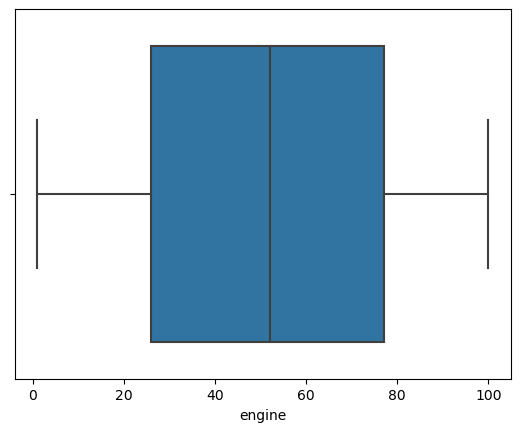

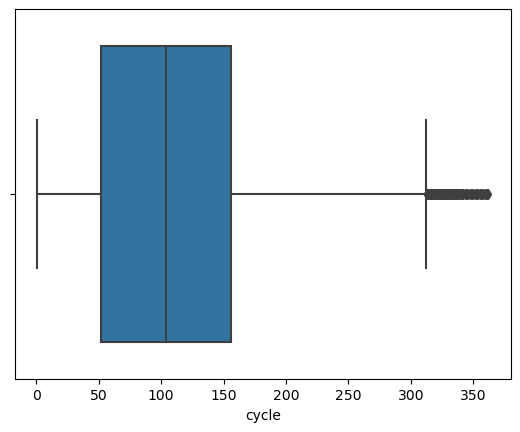

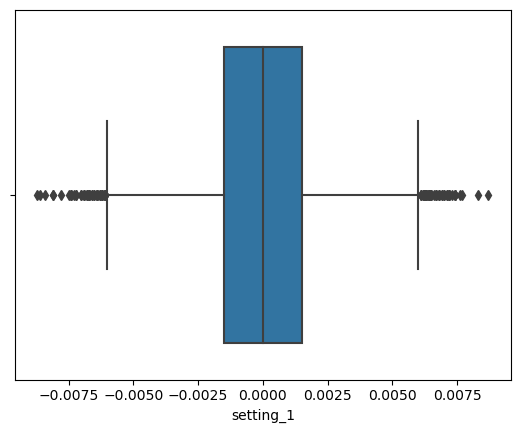

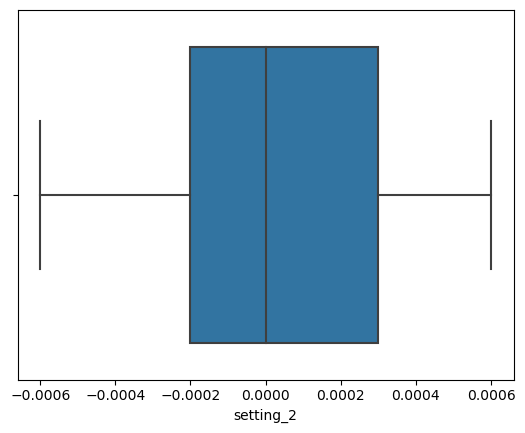

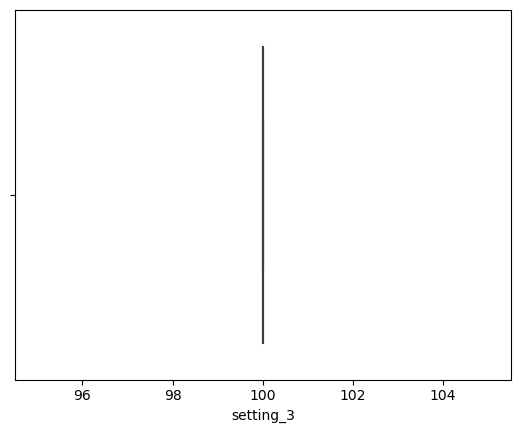

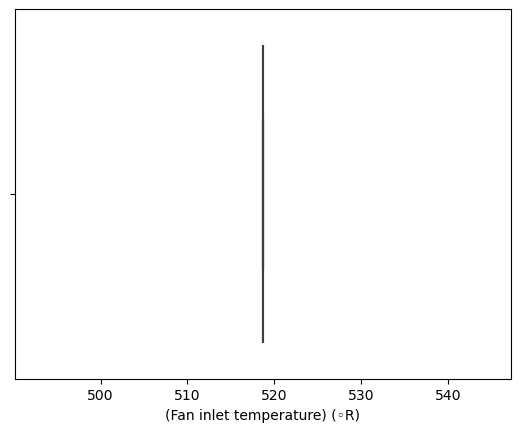

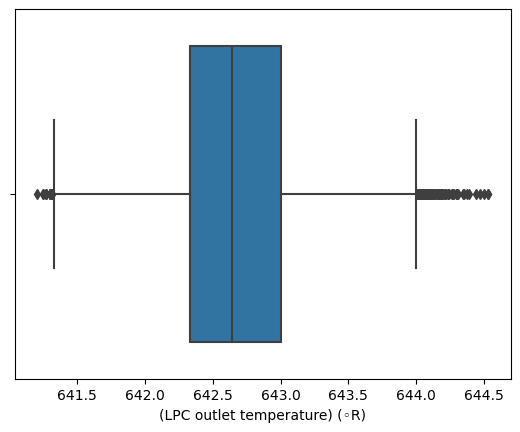

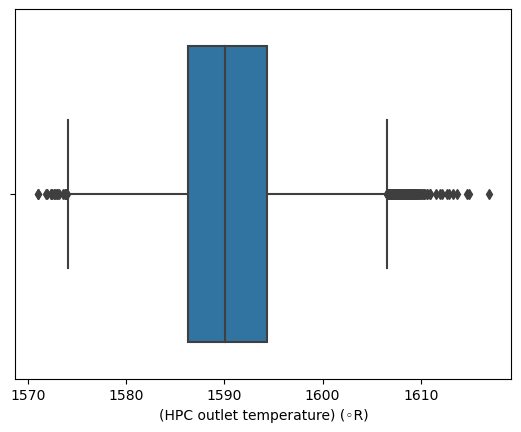

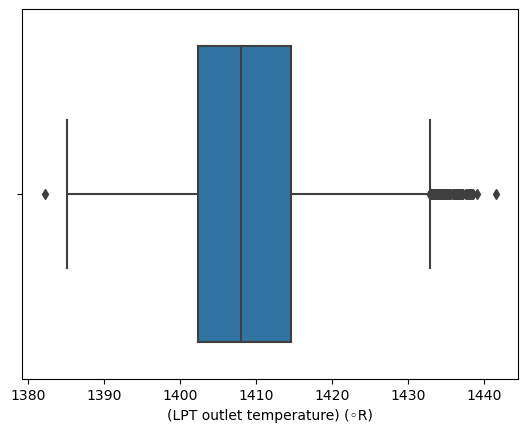

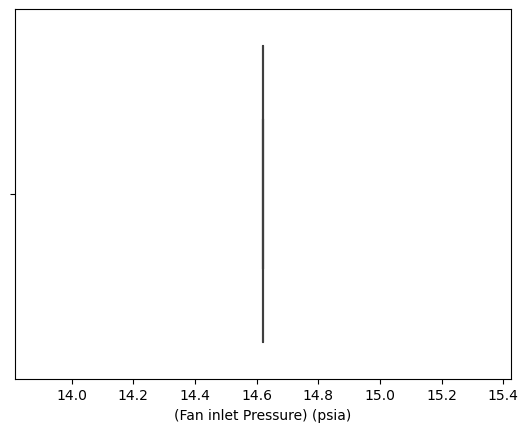

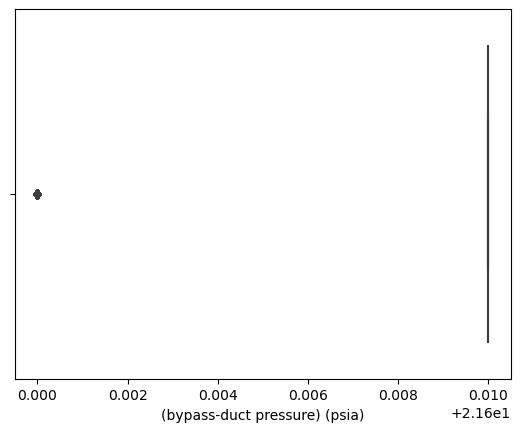

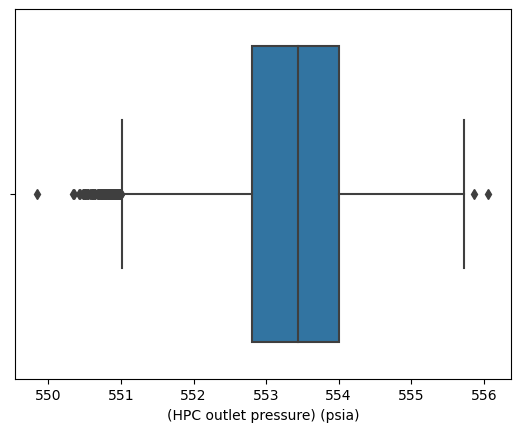

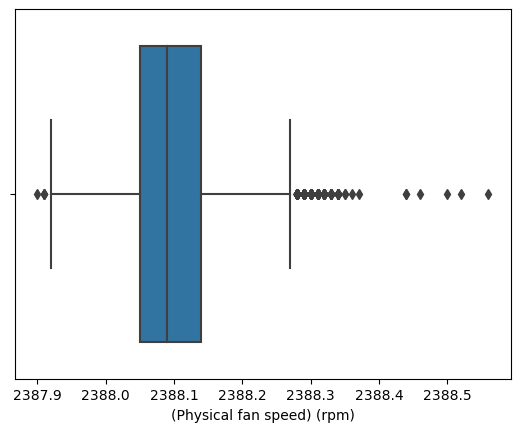

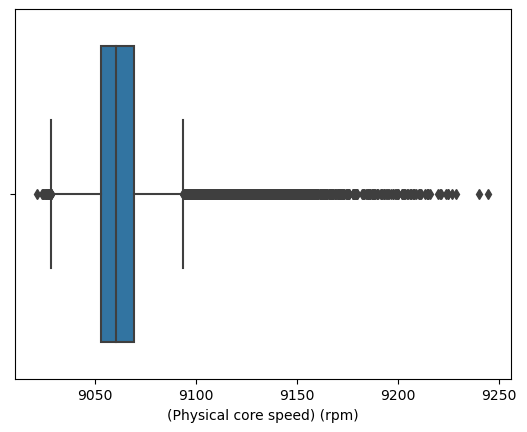

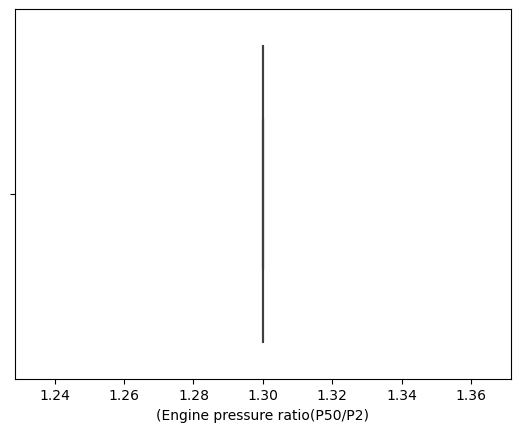

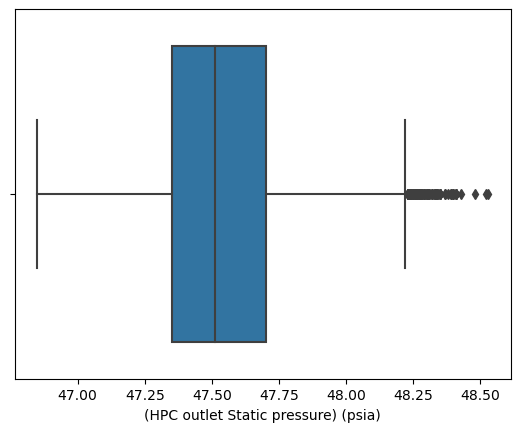

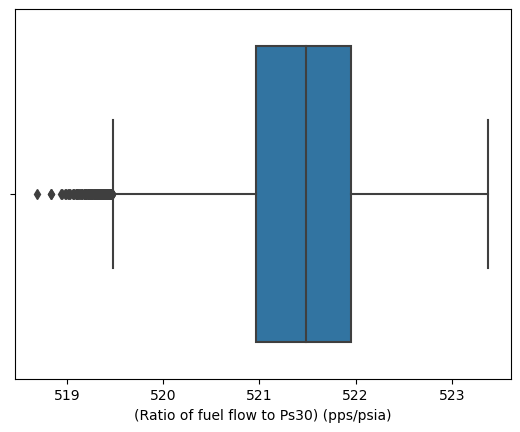

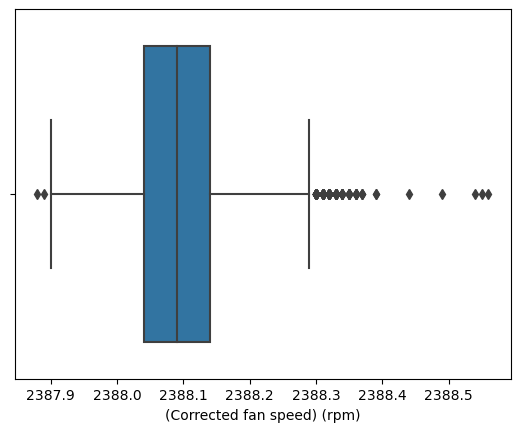

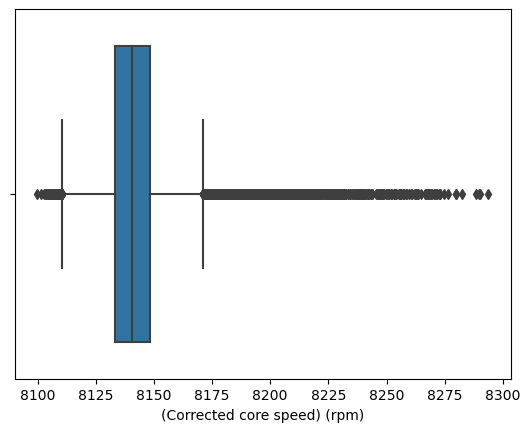

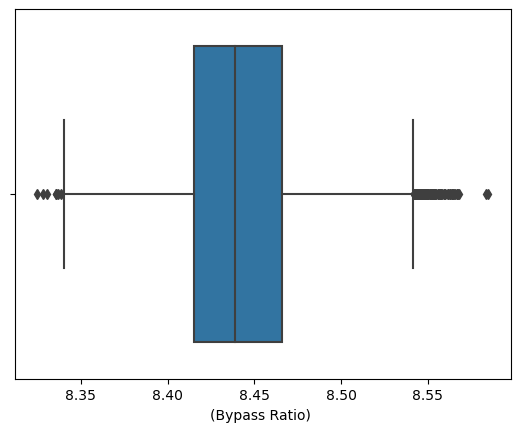

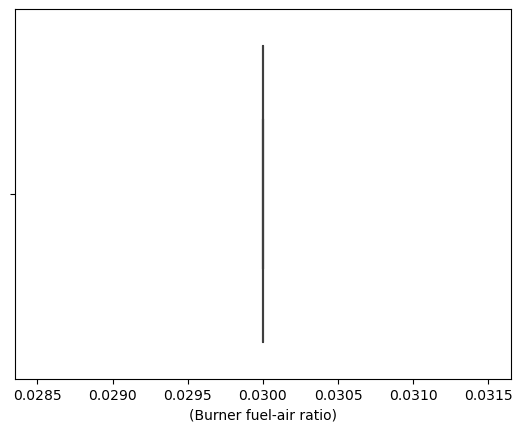

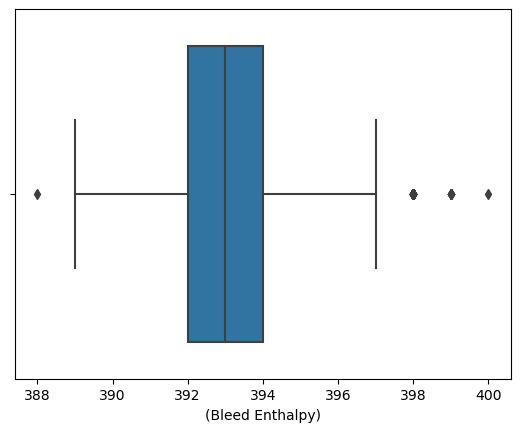

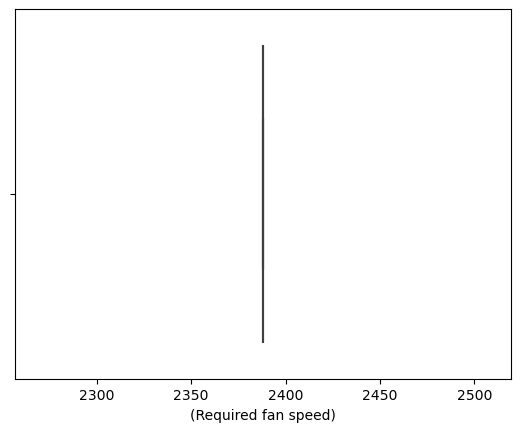

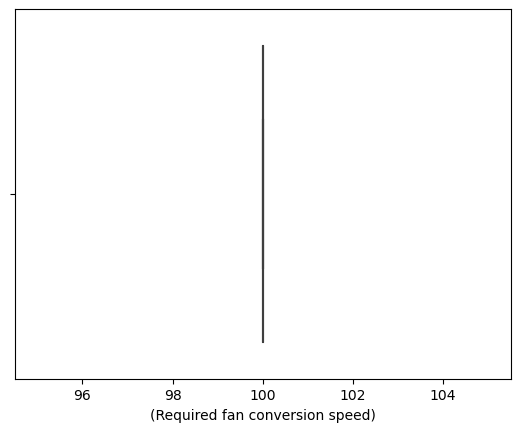

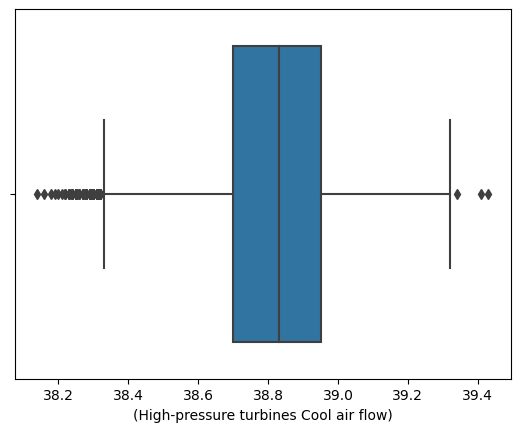

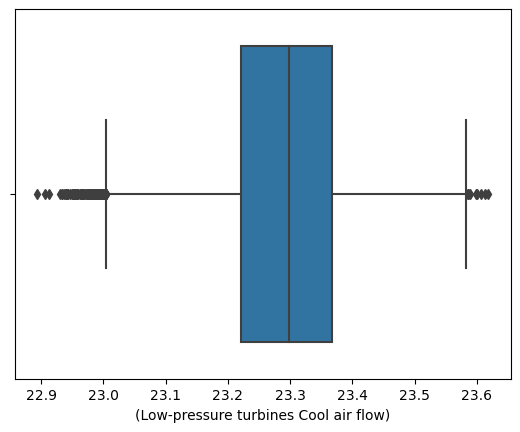

In [18]:
for i in data_train.select_dtypes(include=np.number):
    sns.boxplot(data_train[i])
    plt.show()

In [19]:
#presence of outliers., some data containing only one unique values., 

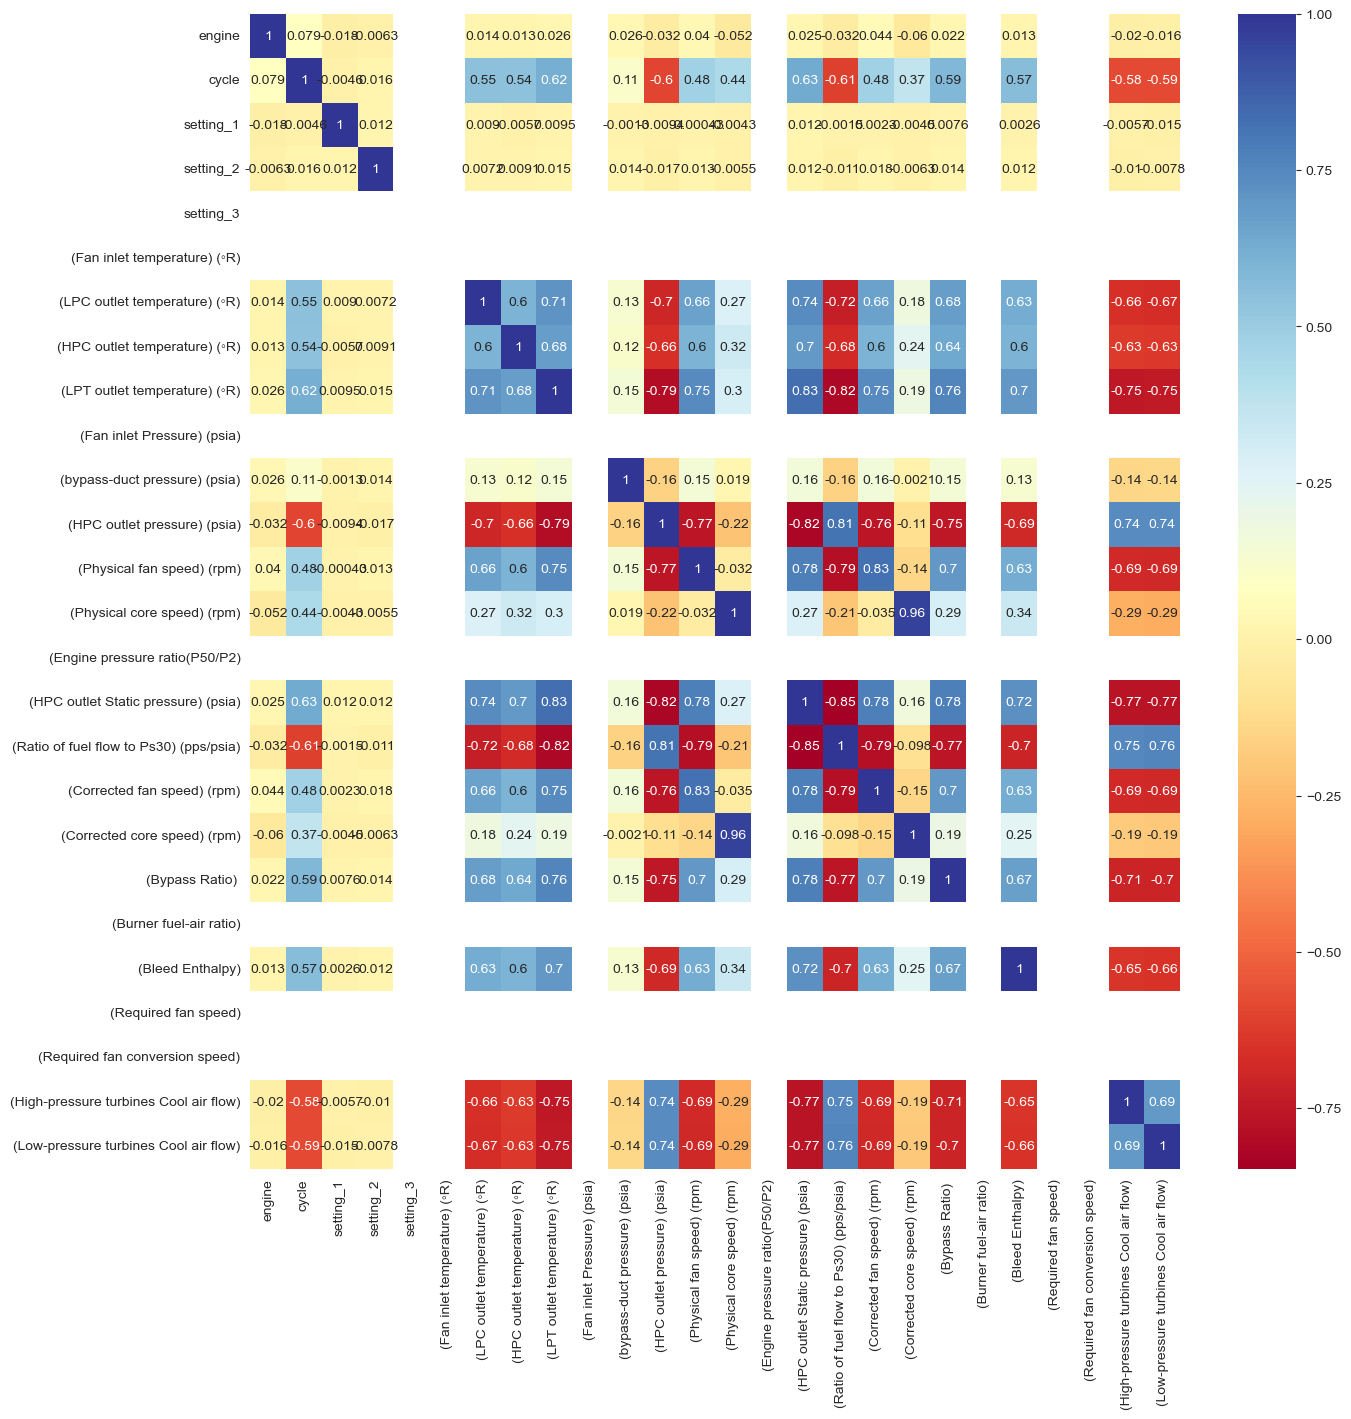

In [20]:
# we will check for correlation
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
plot_kws={"s": 1}
sns.heatmap(data_train.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')



In [21]:
#heavy correlation between variables can be seen, we will fix, threshold value=0.9

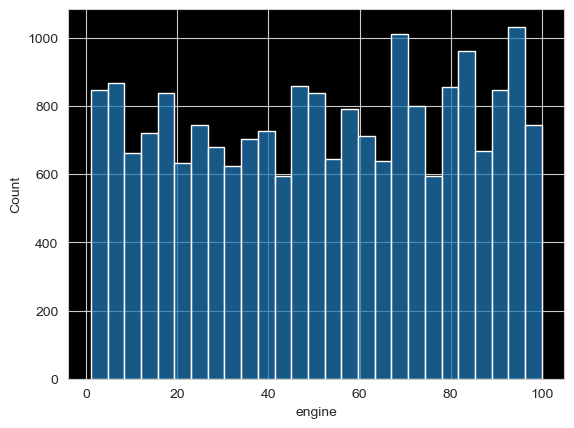

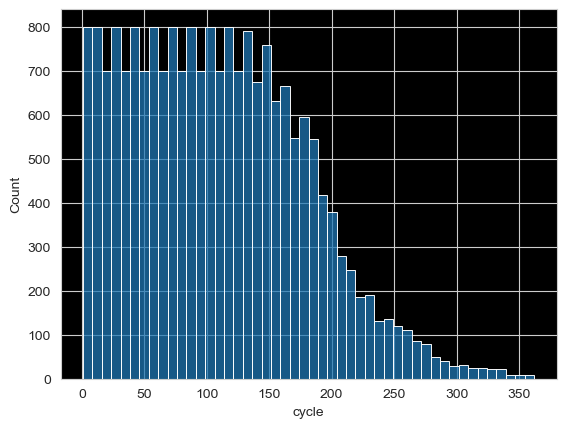

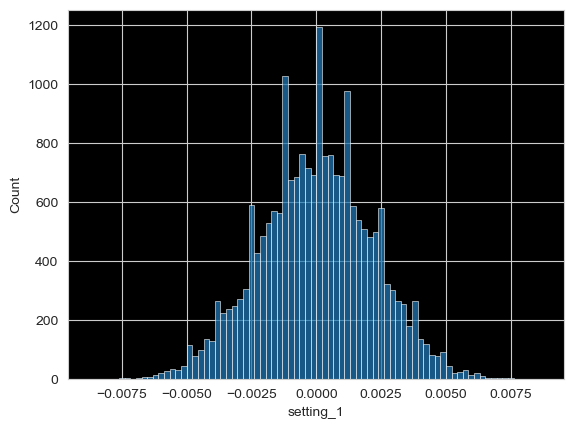

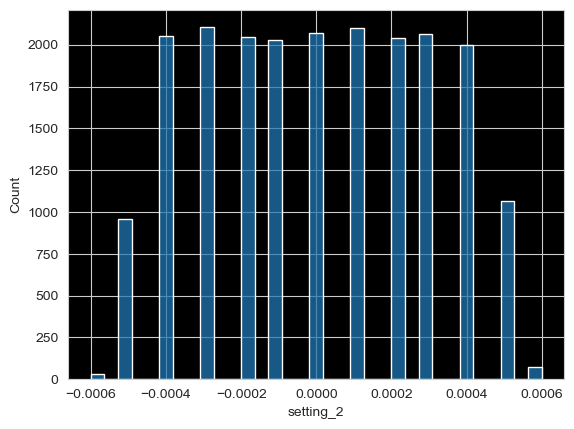

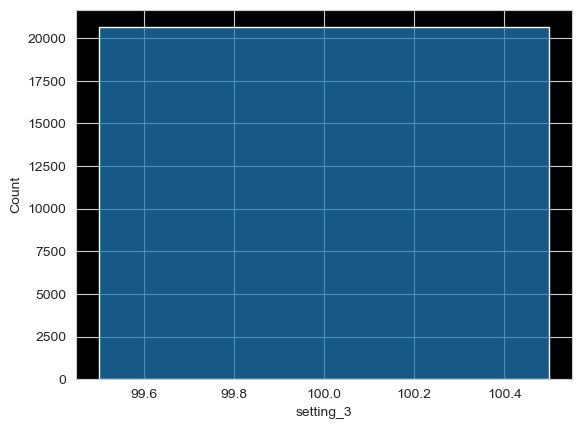

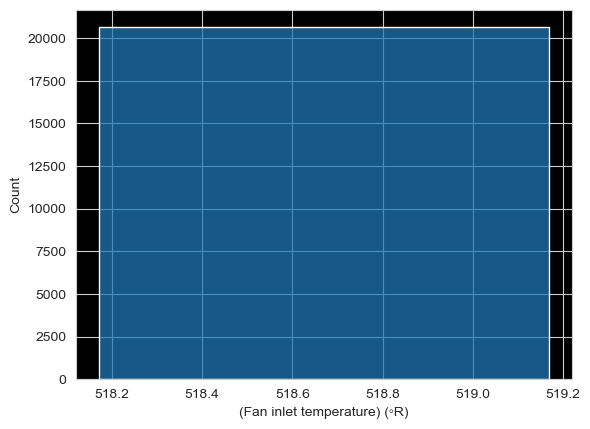

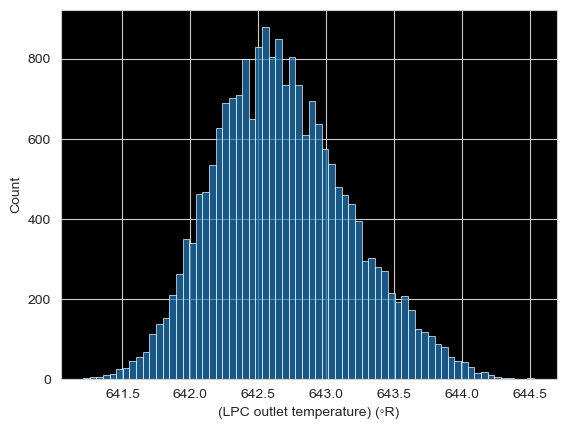

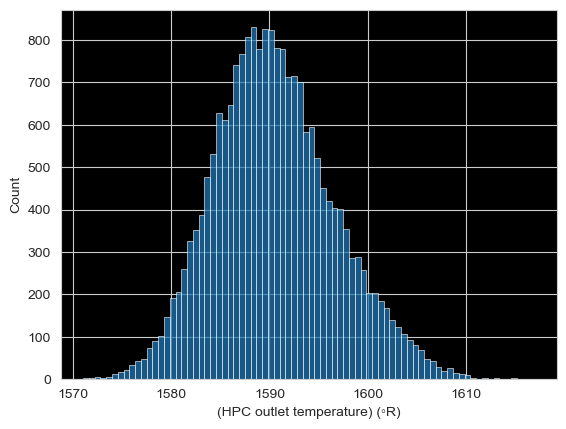

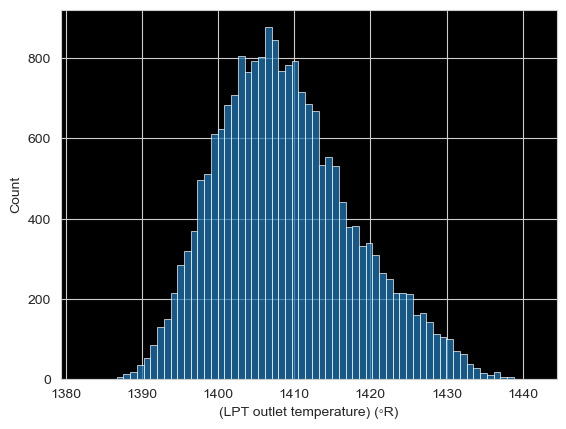

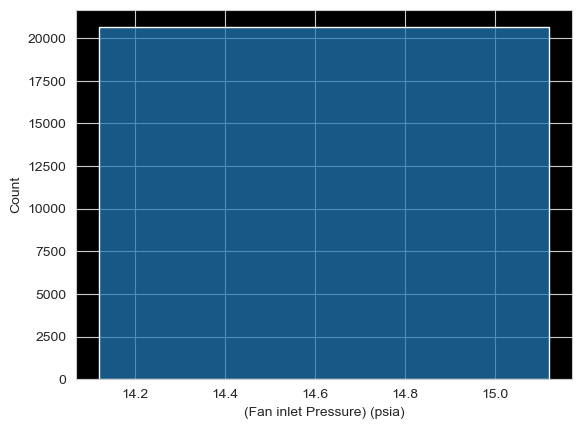

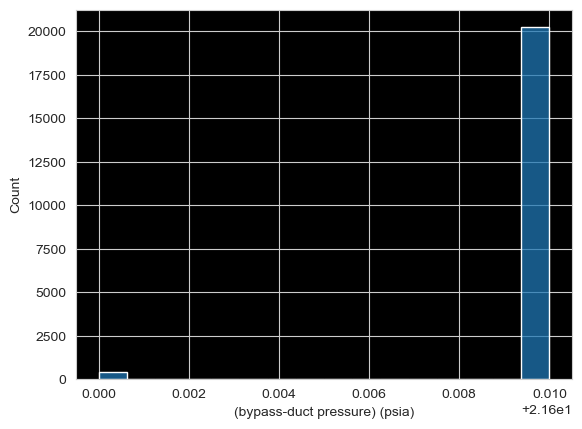

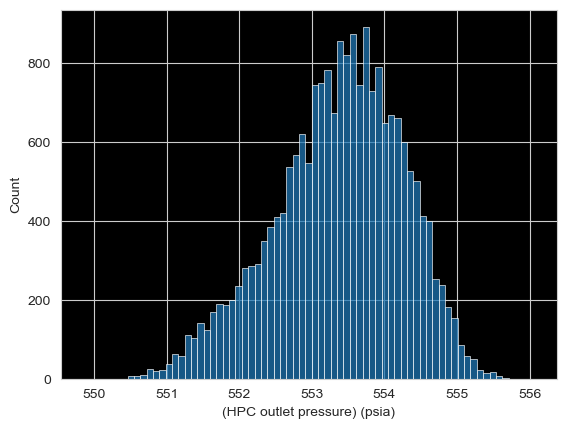

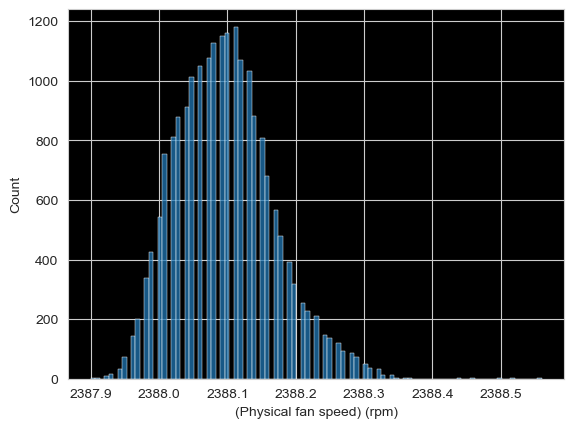

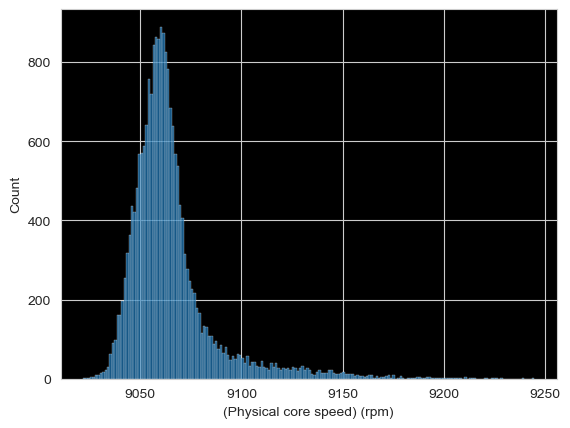

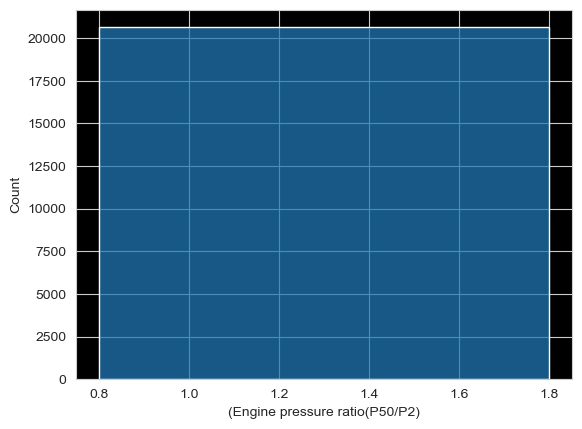

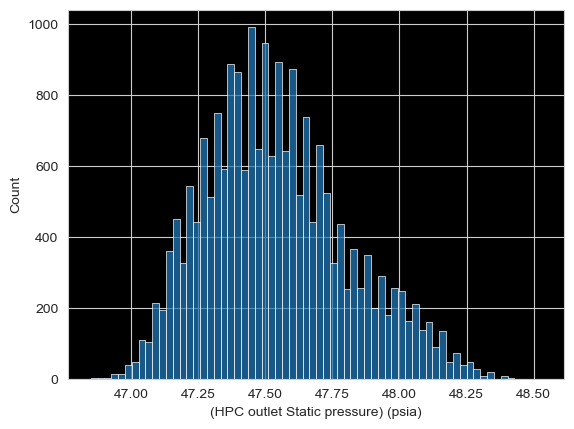

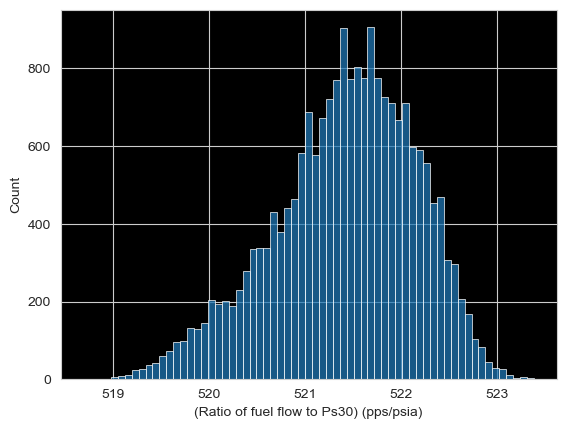

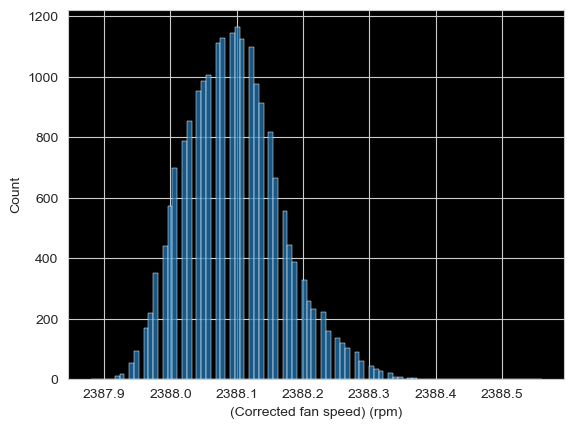

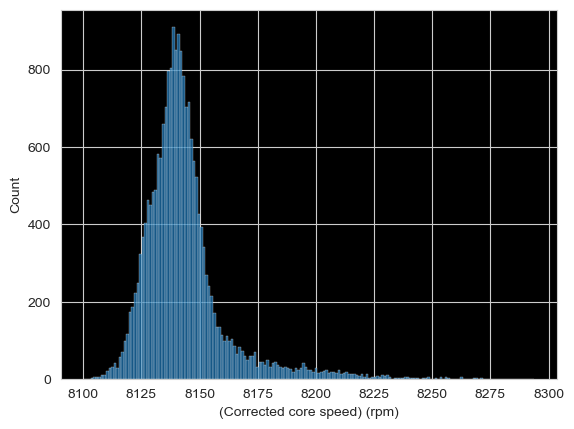

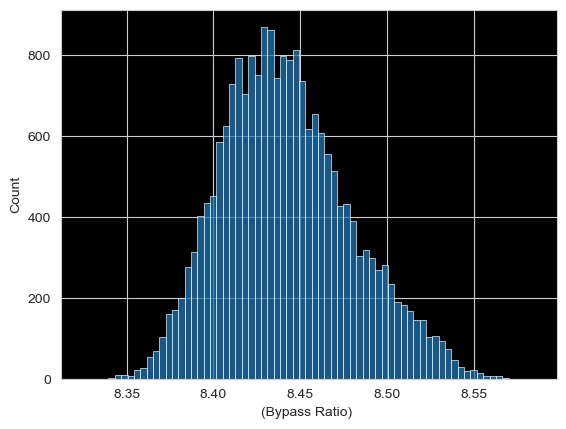

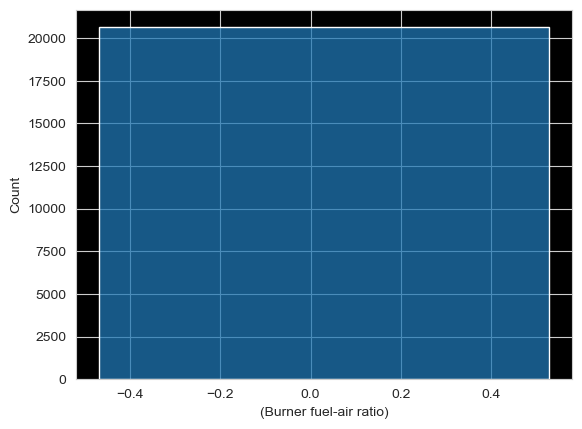

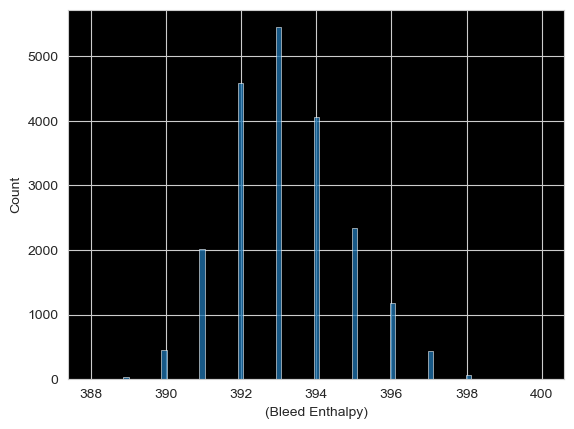

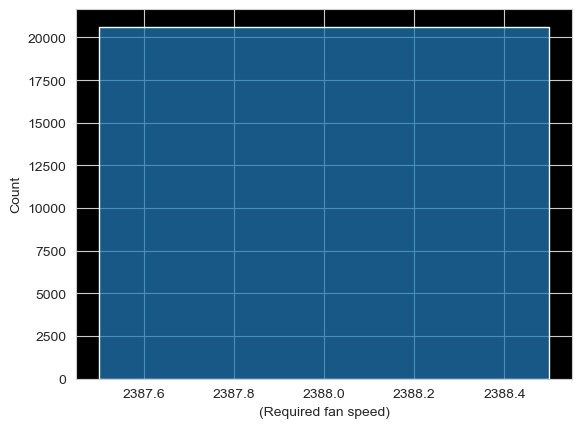

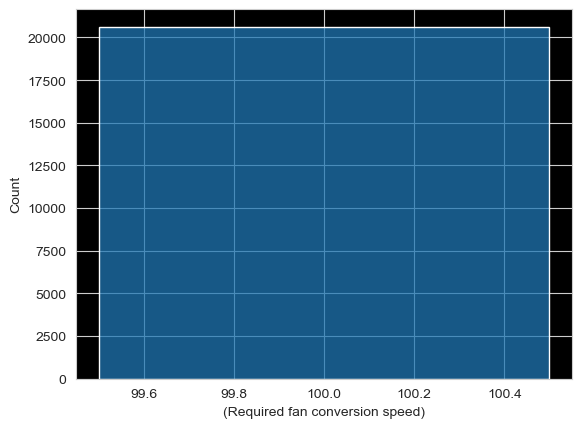

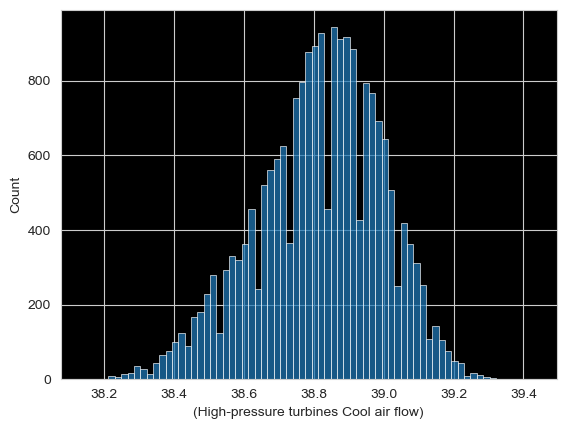

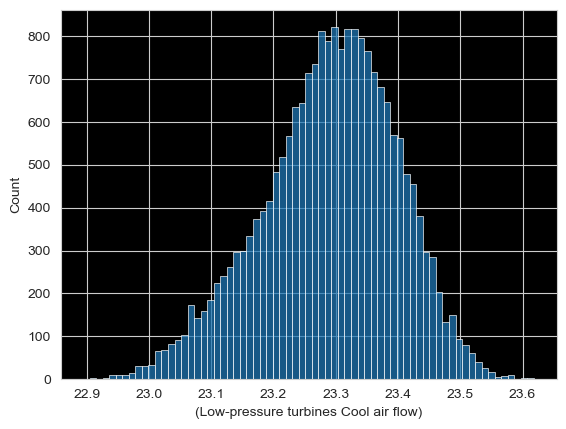

In [22]:
for i in data_train.select_dtypes(include=np.number):
    sns.histplot(data_train[i])
    plt.show()

## Missing value treatment and Dropping unwanted features

In [23]:
print(data_train.shape)

(20630, 26)


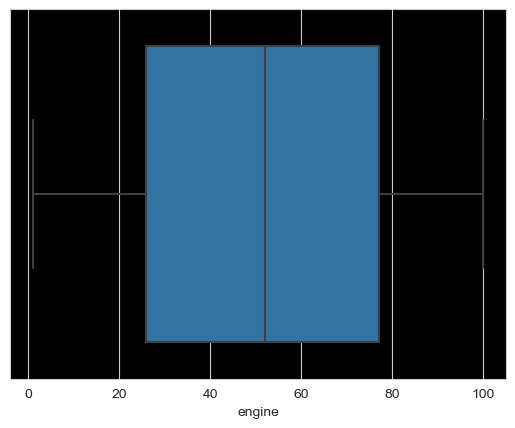

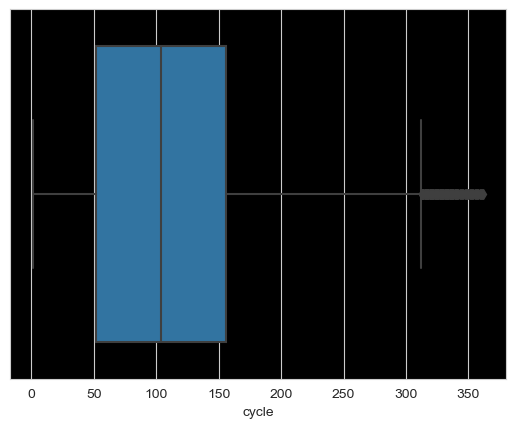

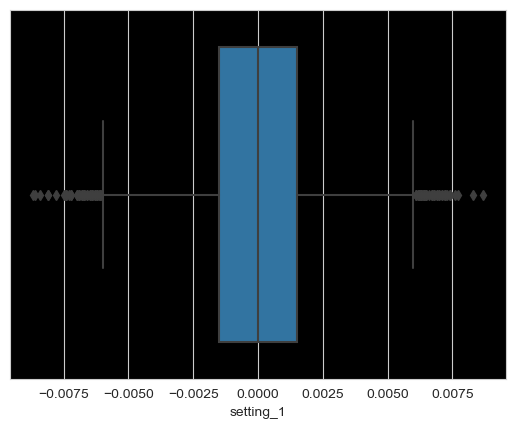

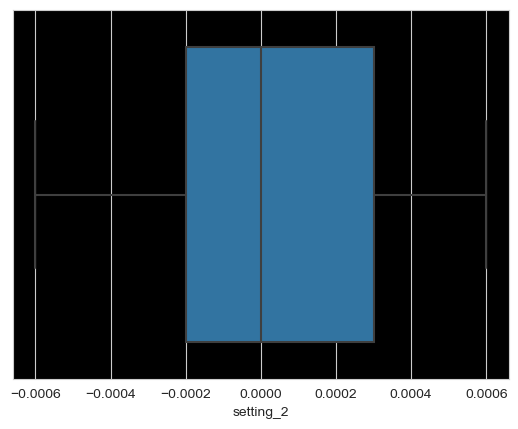

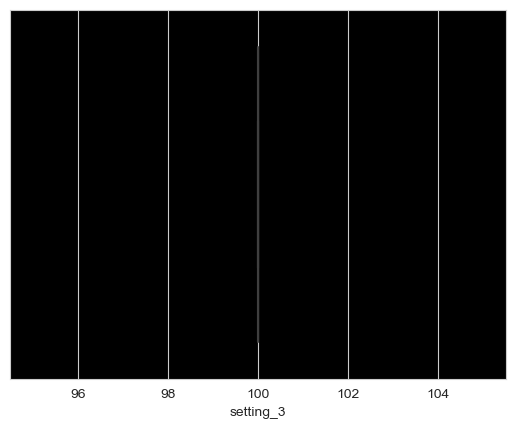

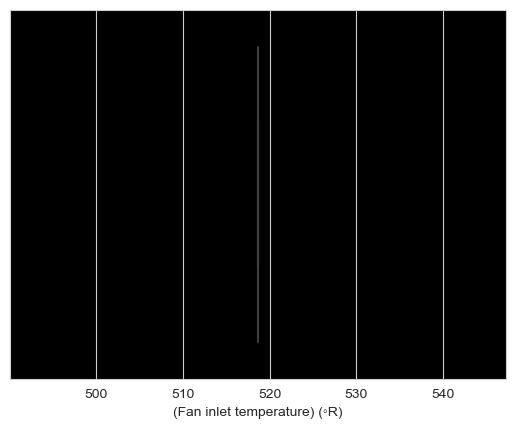

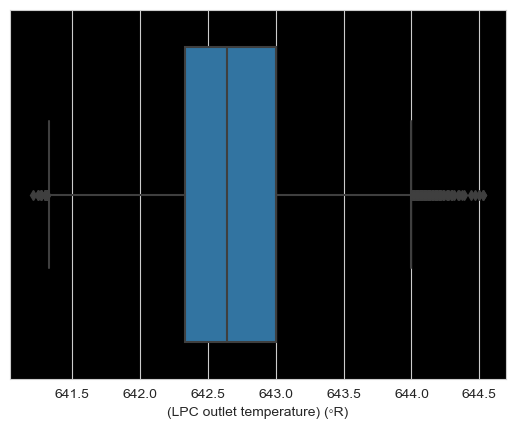

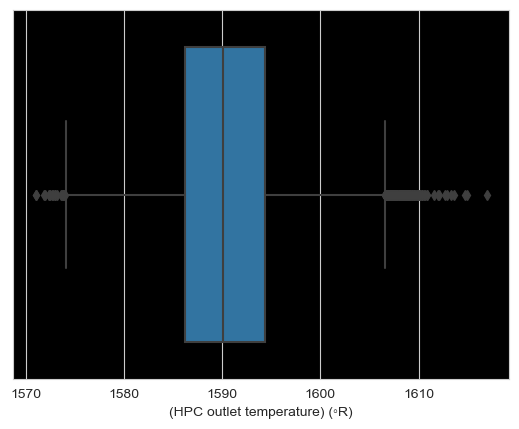

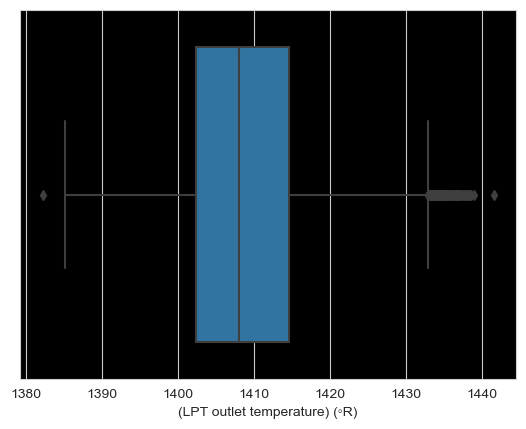

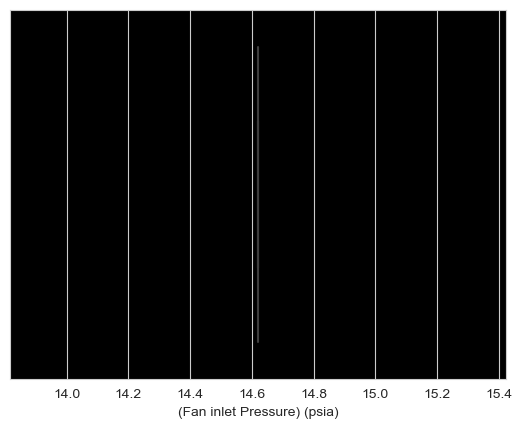

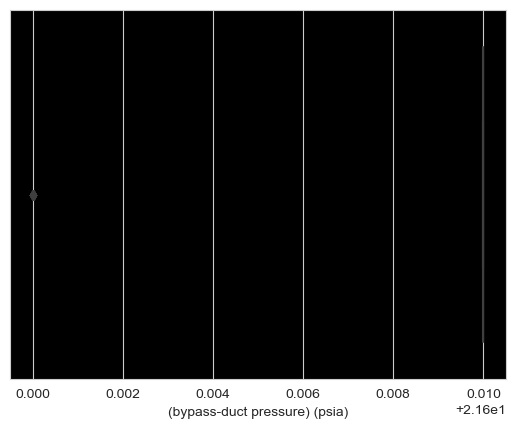

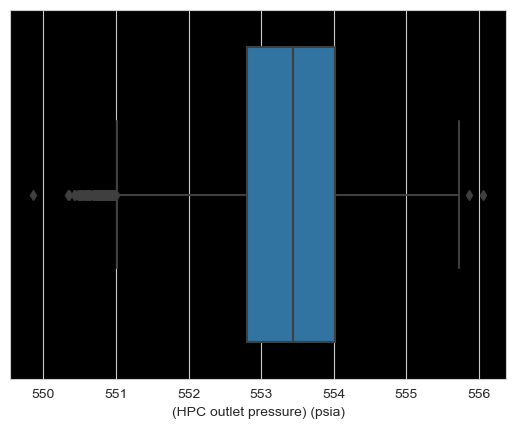

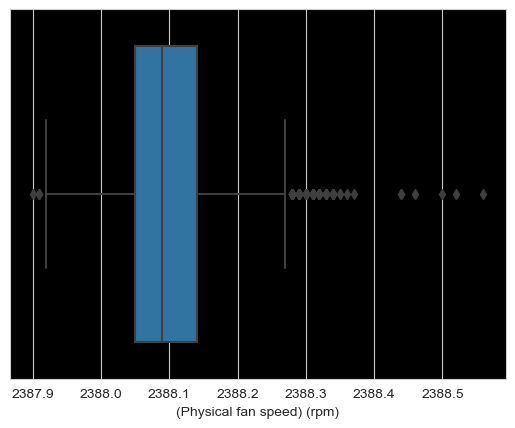

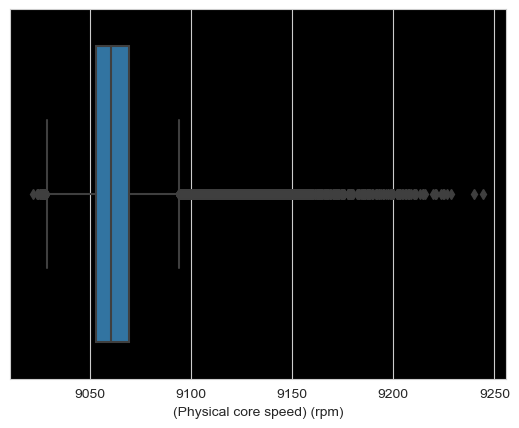

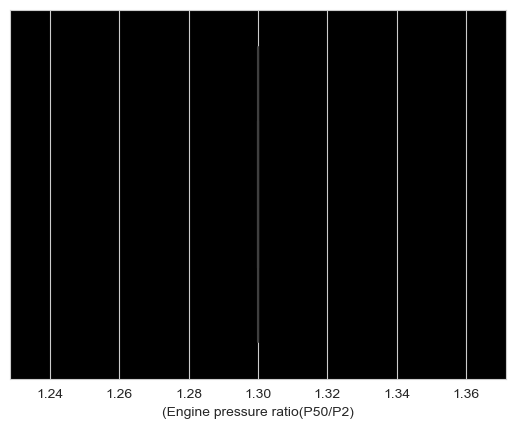

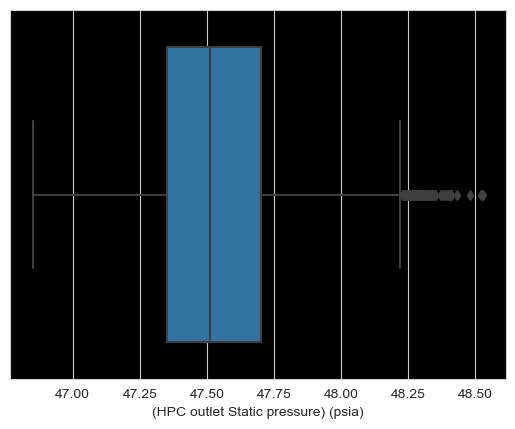

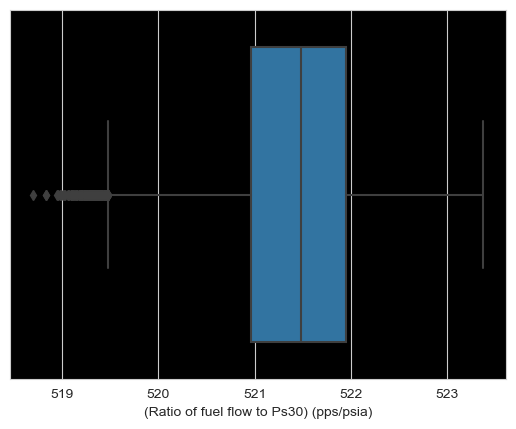

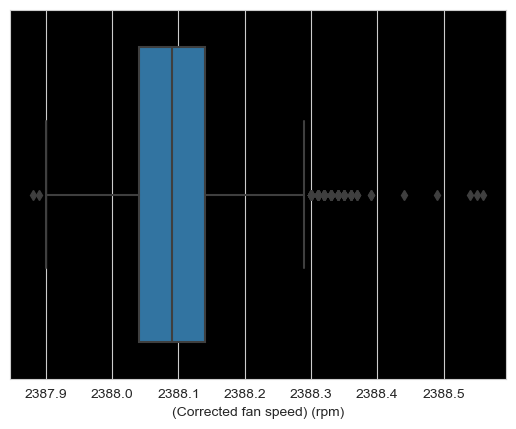

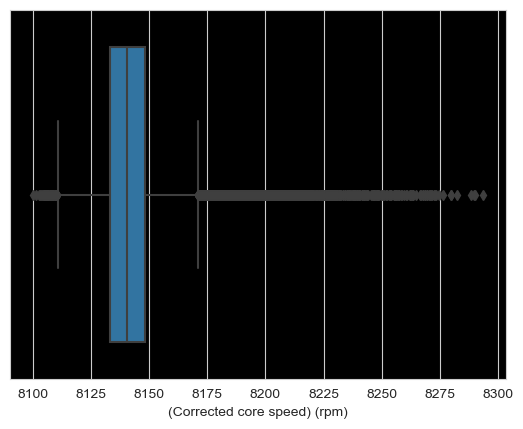

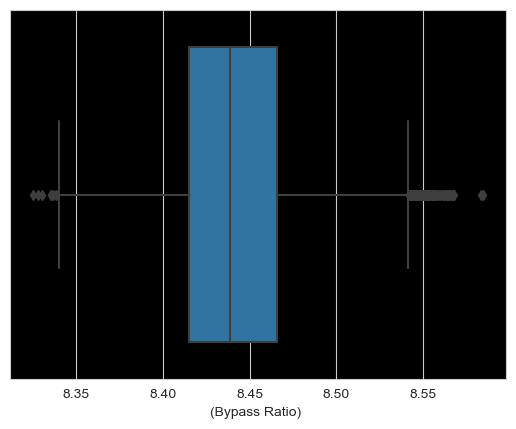

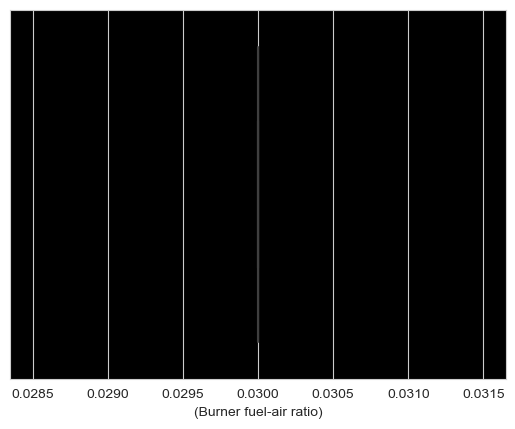

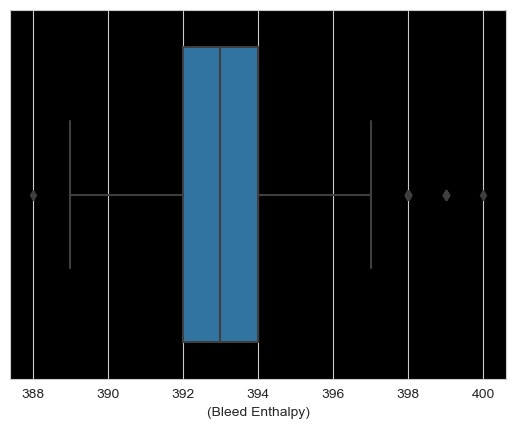

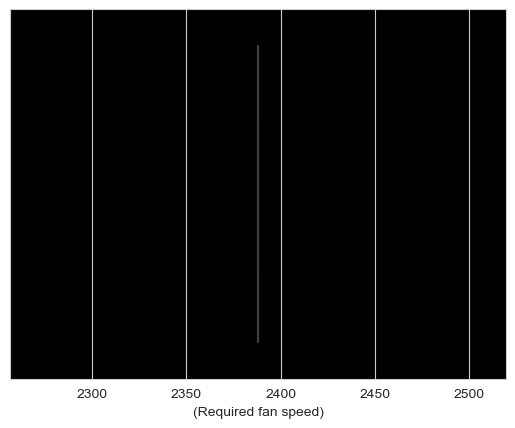

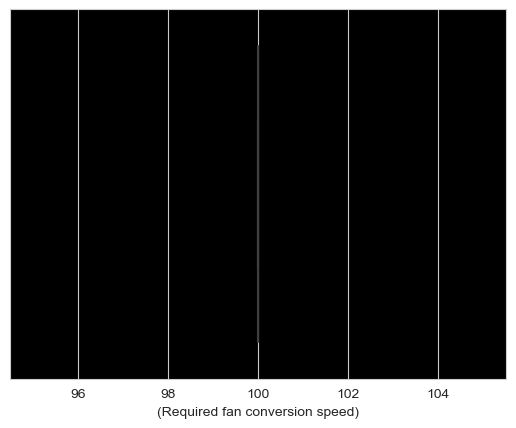

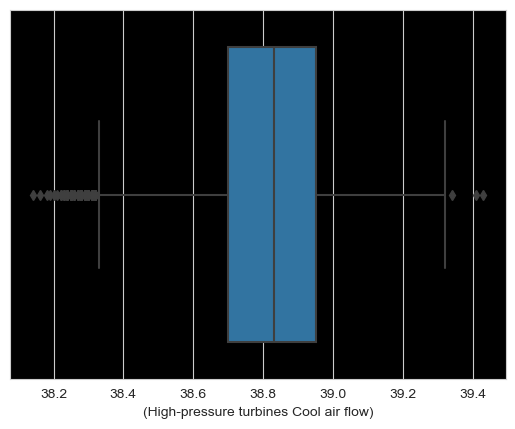

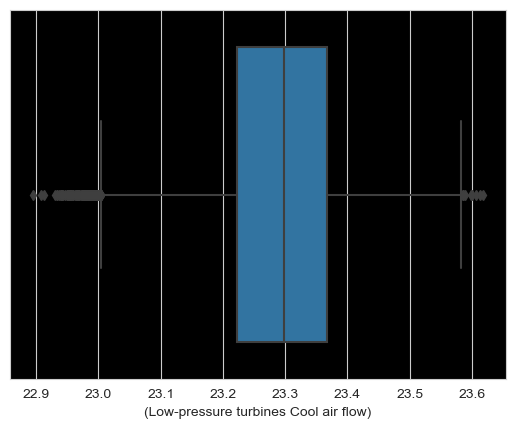

In [24]:
for i in data_train.select_dtypes(include=np.number):
    sns.boxplot(data_train[i])
    plt.show()

In [25]:
data_train.nunique()

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(Engine pressure ratio(P50/P2)                1
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Corrected core speed) (rpm)               6078
(Bypass Ratio)                             1918
(Burner fuel-air ratio)                 

In [26]:
unwanted=[]
for i in data_train.select_dtypes(include=np.number):
    if data_train[i].nunique()==1:
        unwanted.append(i)
print(unwanted)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [27]:
unwanted

['setting_3',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Engine pressure ratio(P50/P2)',
 '(Burner fuel-air ratio)',
 '(Required fan speed)',
 '(Required fan conversion speed)']

In [28]:
data_train.drop(columns=unwanted, inplace=True)

#so we will drop such columns

In [29]:
data_train.shape

(20630, 19)

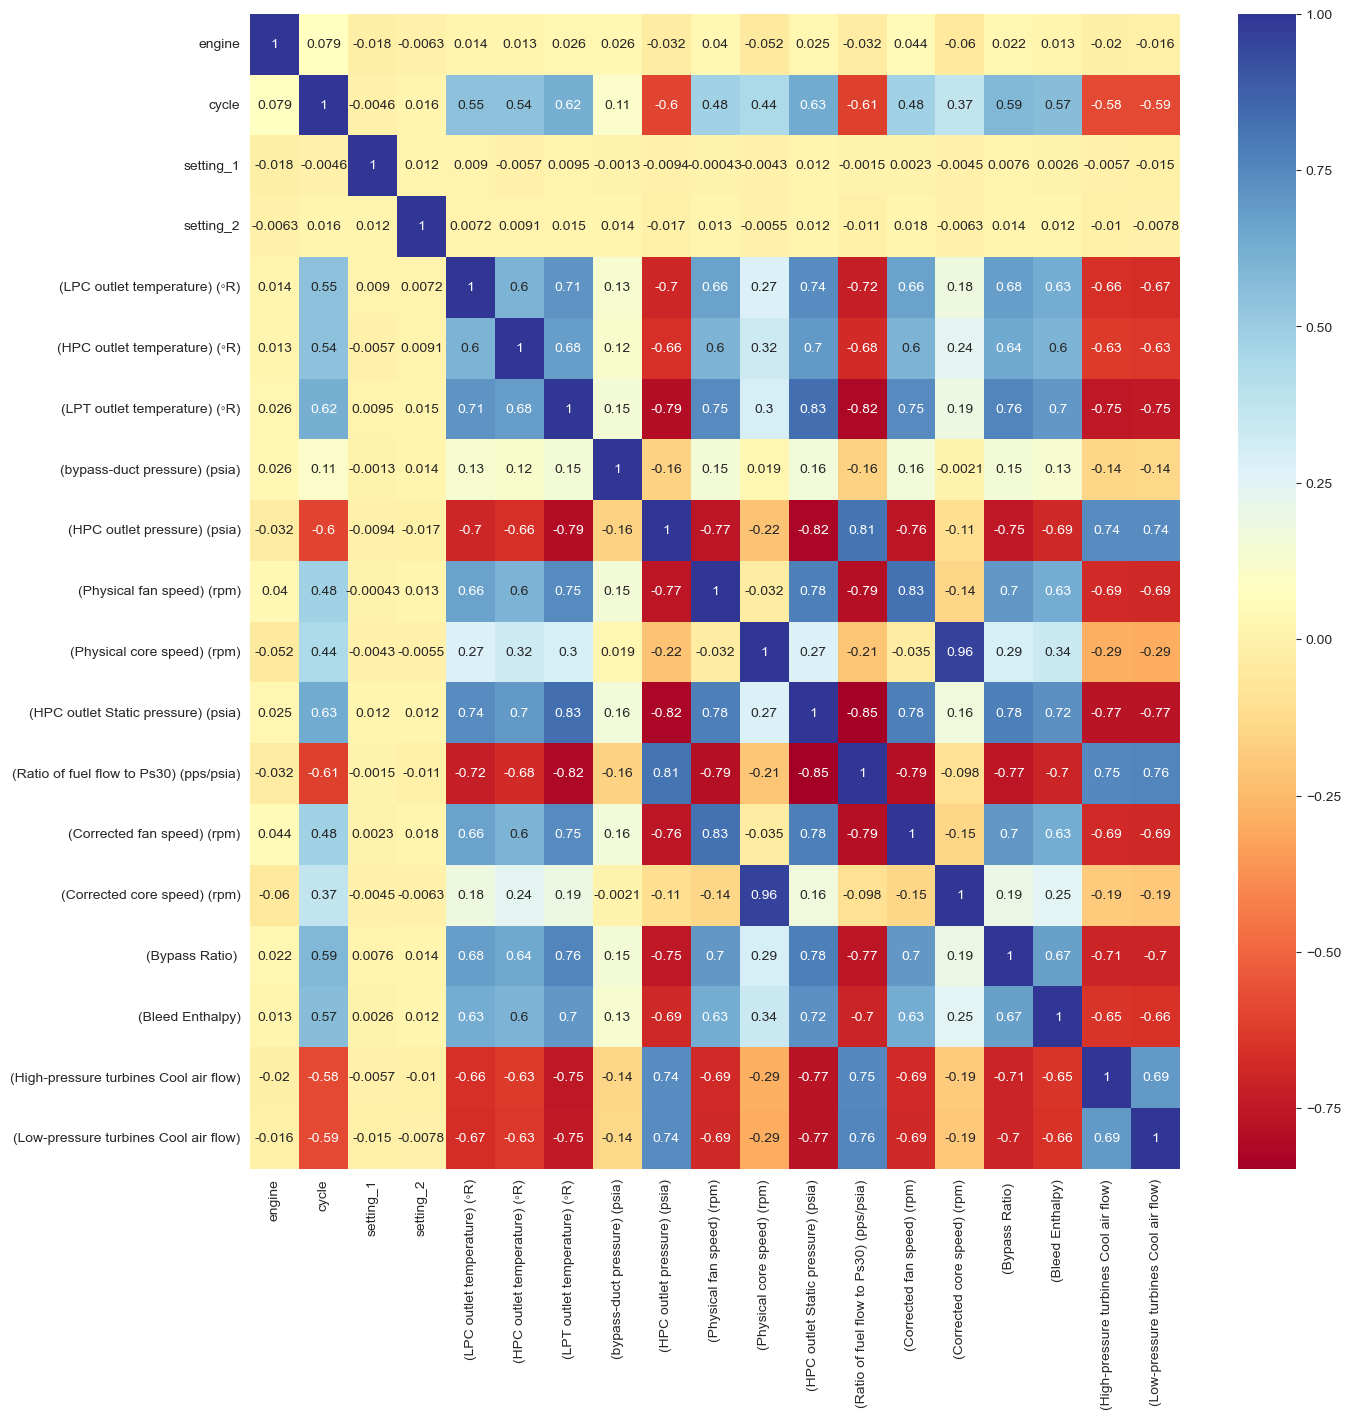

In [30]:
# we will check for correlation
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
plot_kws={"s": 1}
sns.heatmap(data_train.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')



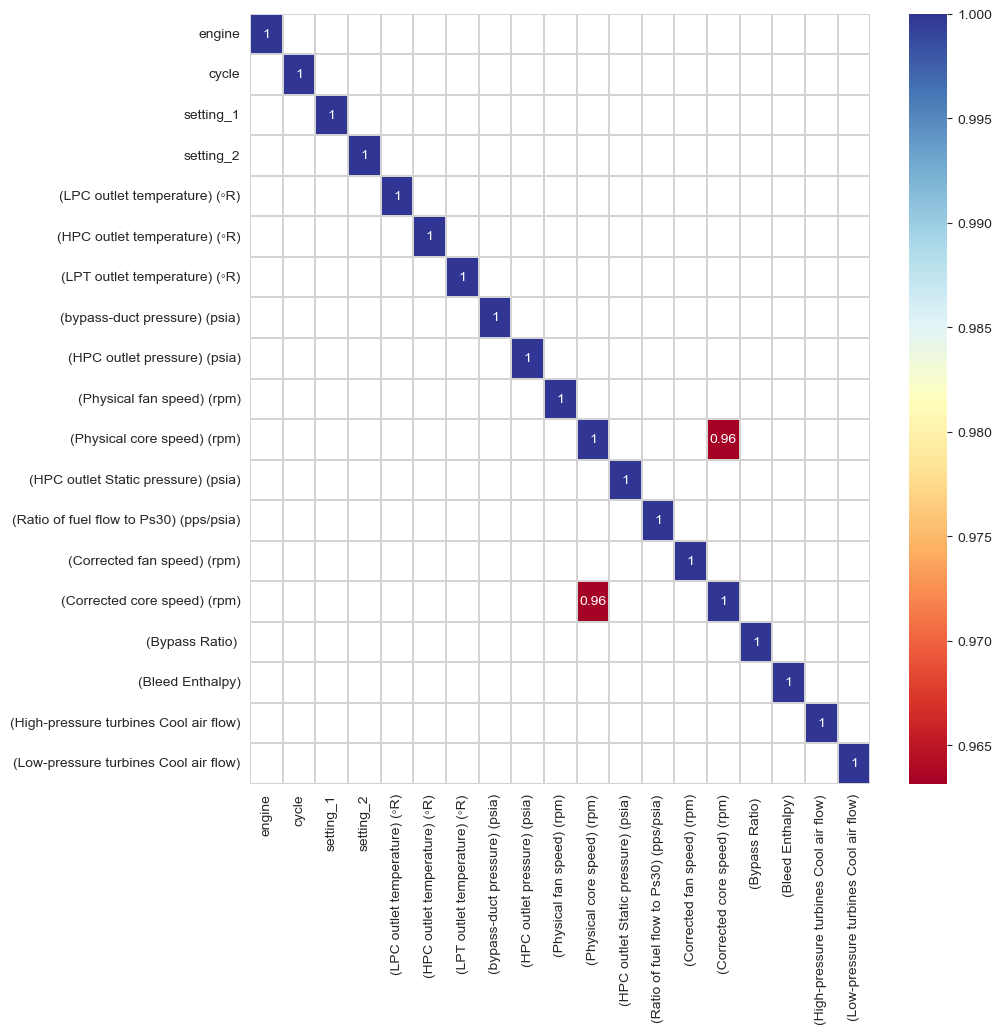

In [31]:
threshold = 0.90
plt.figure(figsize=(10,10))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [32]:
#Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

#by correlation plot we got to know ., '(Corrected core speed) (rpm)' and '(Physical core speed) (rpm)' have high correlation 
#so will drop one ['(Corrected core speed) (rpm)']

data_train.drop(['(Corrected core speed) (rpm)'],axis=1,inplace=True)

In [33]:
list(data_train)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [34]:
list(data_train)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [35]:
data_train.shape

(20630, 18)

In [36]:
features = list(data_train.columns)
features

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [37]:
data_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669


# Outler Detection and Treatment

In [38]:
data_train

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735
20626,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594
20627,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333
20628,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640


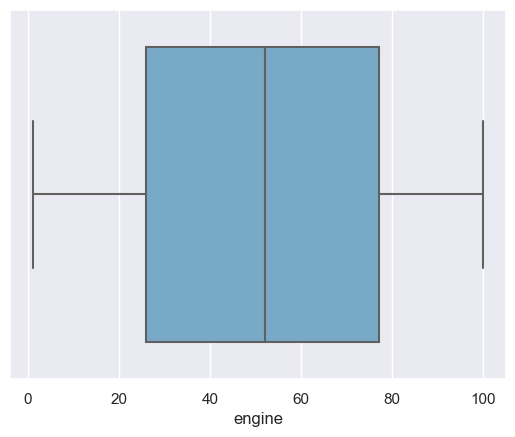

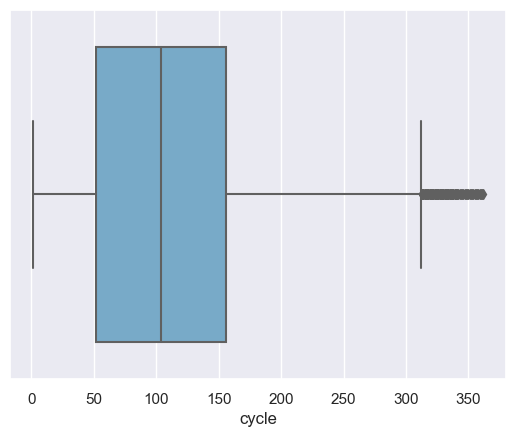

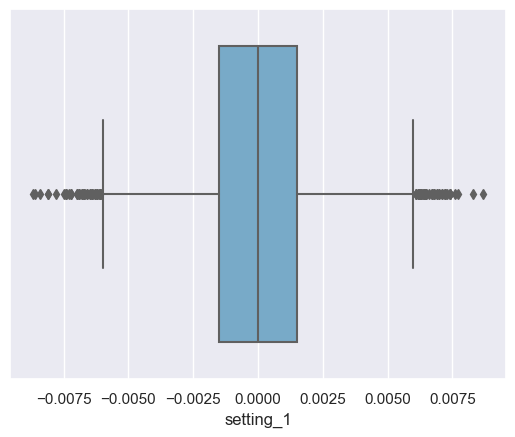

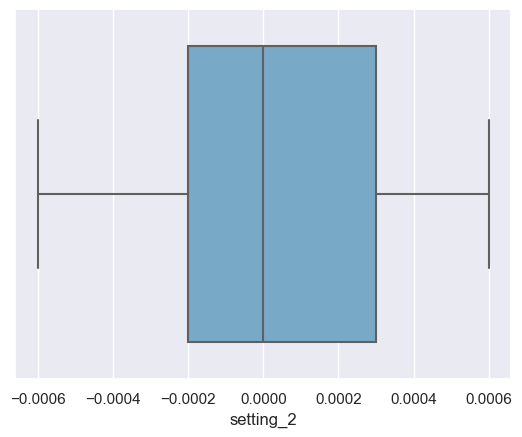

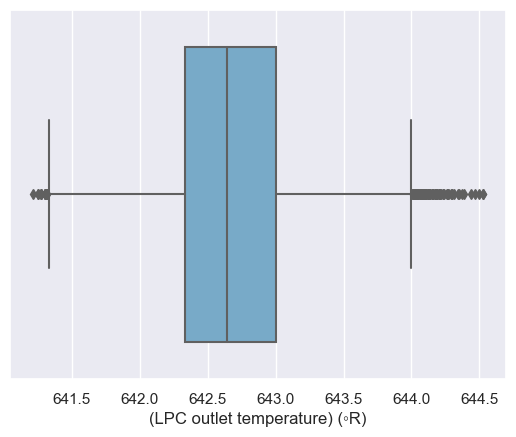

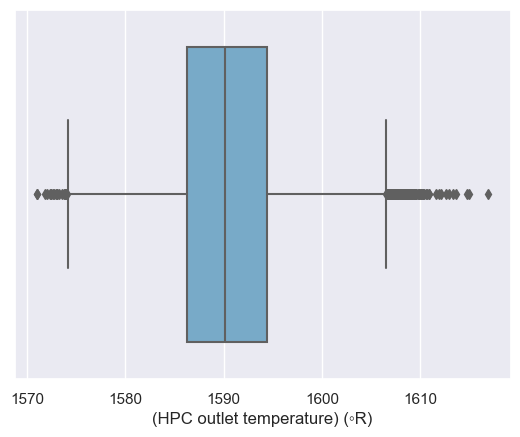

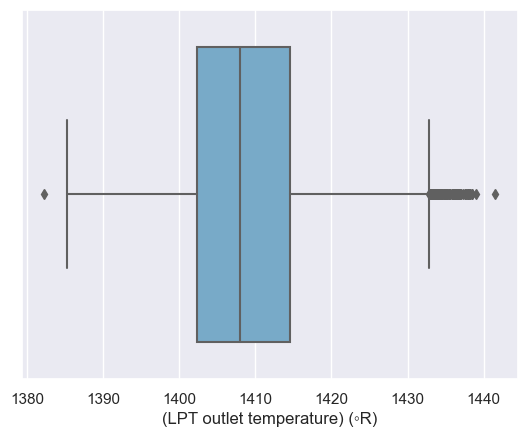

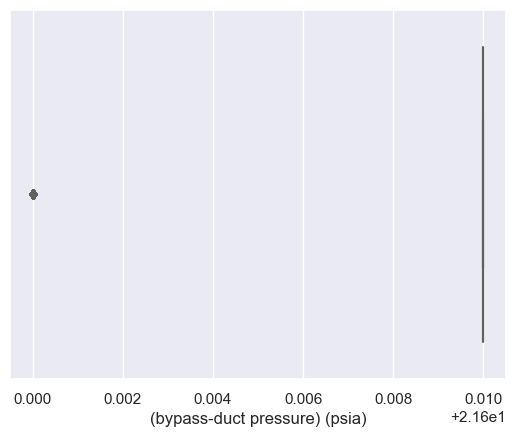

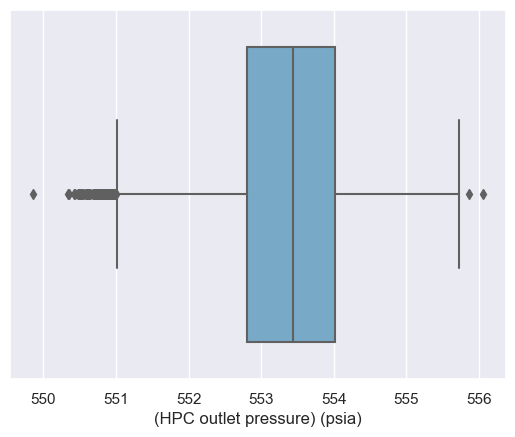

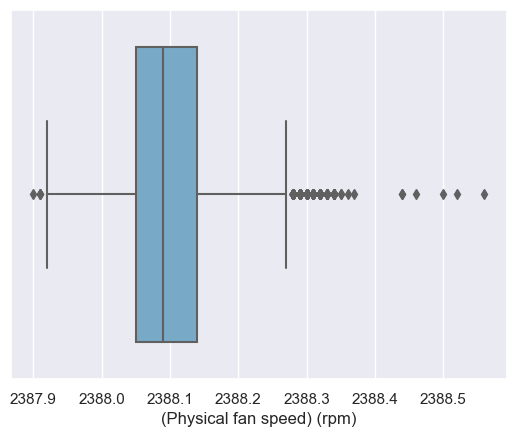

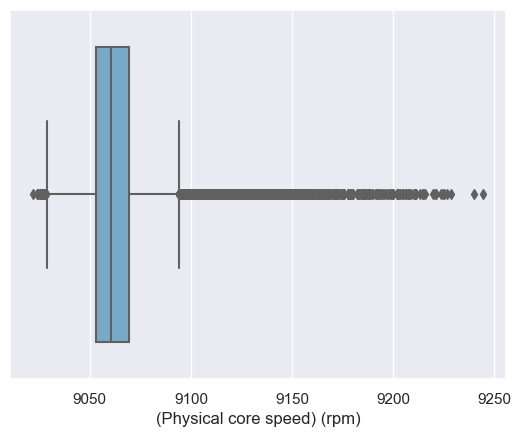

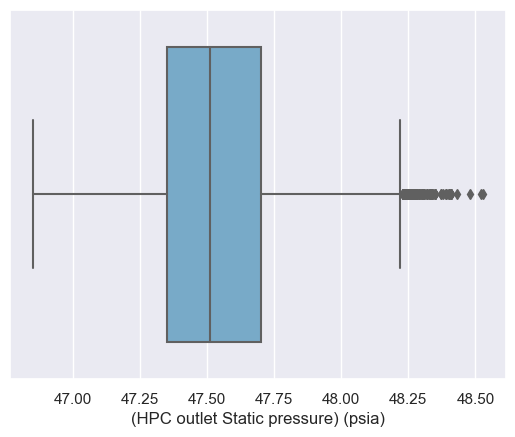

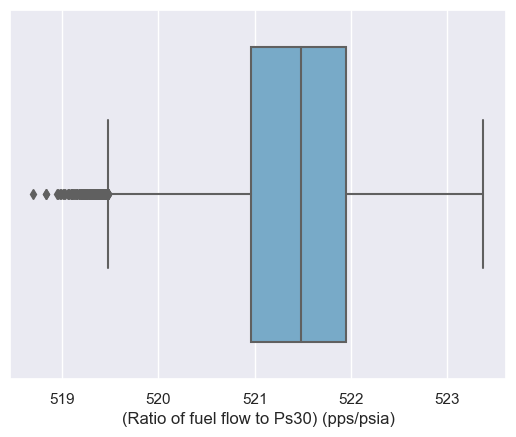

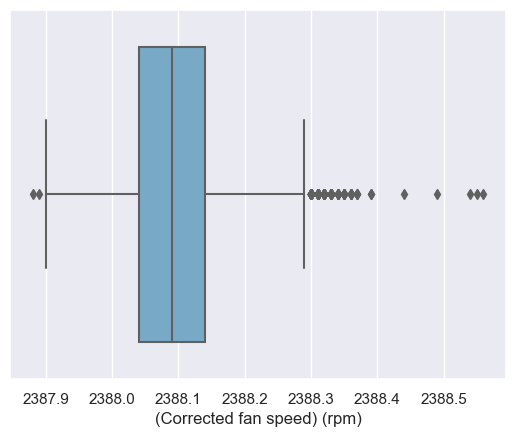

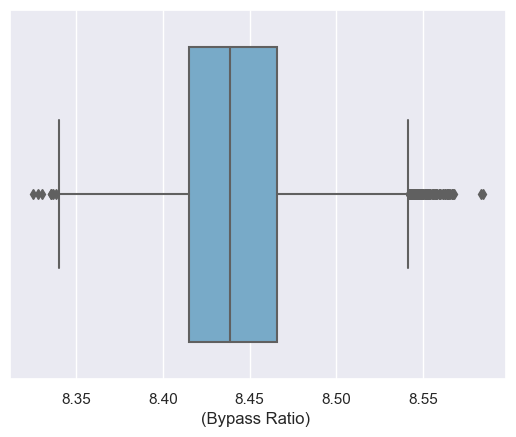

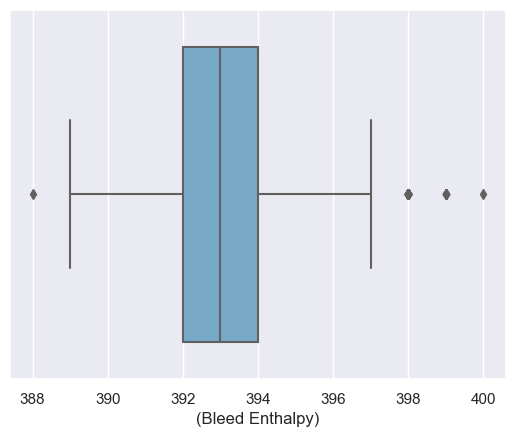

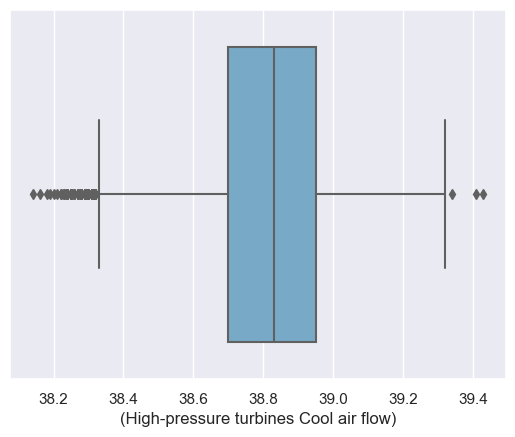

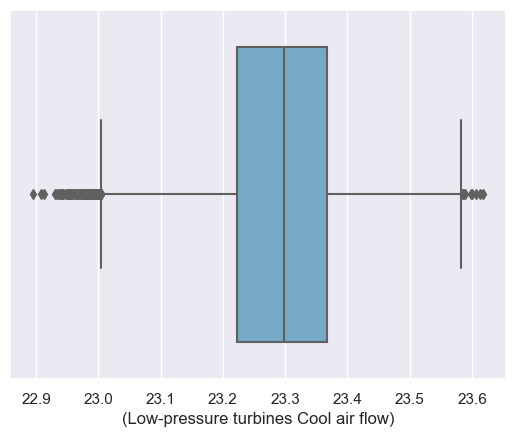

In [39]:
for i in data_train.select_dtypes(include=np.number):
    sns.set(style="darkgrid")
    sns.boxplot(data_train[i],palette="Blues")
    
    plt.show()

In [40]:
data_train.shape

(20630, 18)

In [41]:
data_train.nunique()

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Bypass Ratio)                             1918
(Bleed Enthalpy)                             13
(High-pressure turbines Cool air flow)      120
(Low-pressure turbines Cool air flow)      4745
dtype: int64

In [42]:
data_train['(bypass-duct pressure) (psia)'].unique()

array([21.61, 21.6 ])

In [43]:
(((data_train['(bypass-duct pressure) (psia)']==21.61).sum())/data_train.shape[0])*100

98.0319922443044

In [44]:
(((data_train['(bypass-duct pressure) (psia)']==21.6).sum())/data_train.shape[0])*100

1.9680077556955888

bypass air:The ratio of the air that goes around the engine to the air that goes through the core is called the bypass ratio.

In [45]:
#so 98% (bypass-duct pressure) has 26.61psia., and 1.9% has 26.6psia.,
#and 26.61 is almost equal to 26.6., that means, we have only 1 unique value., 
# so will drop this column
data_train.drop(['(bypass-duct pressure) (psia)'],axis=1,inplace=True)

In [46]:
data_train.shape

(20630, 17)

In [47]:
data_train.nunique()

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Bypass Ratio)                             1918
(Bleed Enthalpy)                             13
(High-pressure turbines Cool air flow)      120
(Low-pressure turbines Cool air flow)      4745
dtype: int64

In [48]:
#OUTLIER TREAMENT FOR TRAIN DATA
# calculate the z-scores for each column
z_scores = data_train.apply(lambda x: np.abs((x - x.mean()) / x.std()))

# set a threshold for the z-score
threshold = 3

# identify the outliers
outliers = z_scores > threshold

In [49]:
z_scores = (data_train - data_train.mean()) / data_train.std()

# Replace values that exceed a certain threshold with the mode
threshold = 2.5
for col in data_train.columns:
    outlier_mask = z_scores[col].abs() > threshold
    data_train.loc[outlier_mask, col] = data_train[col].mask(outlier_mask).mode()[0]

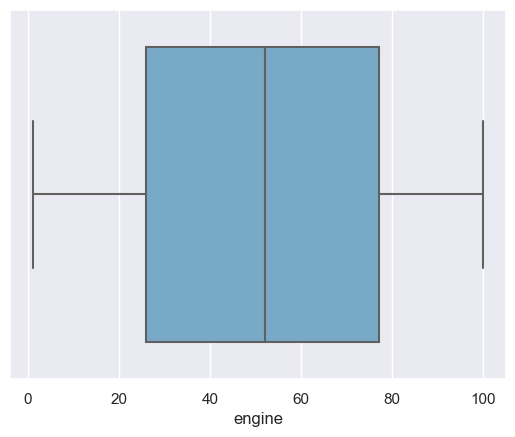

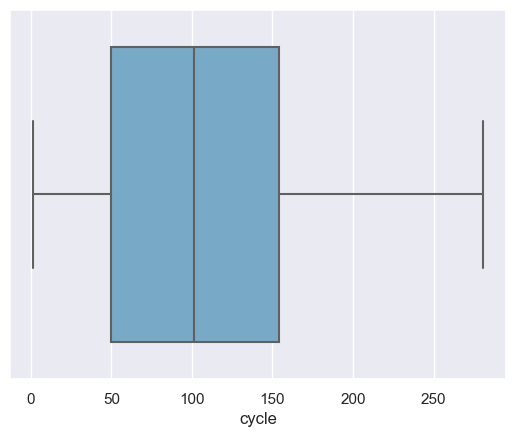

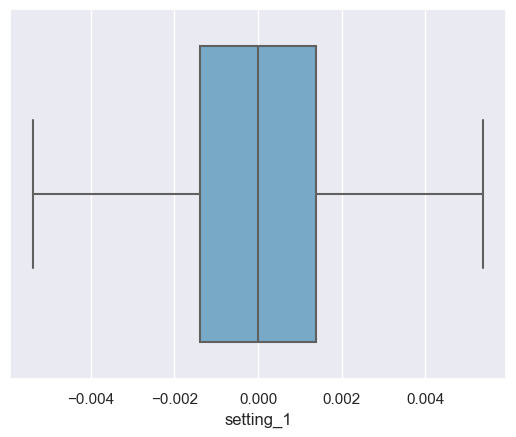

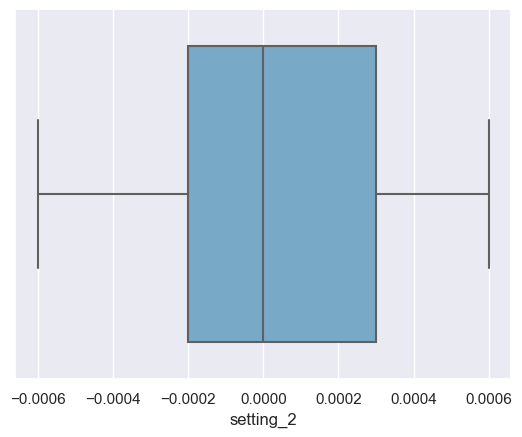

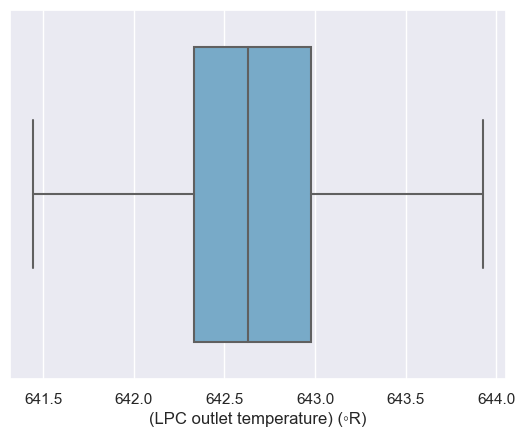

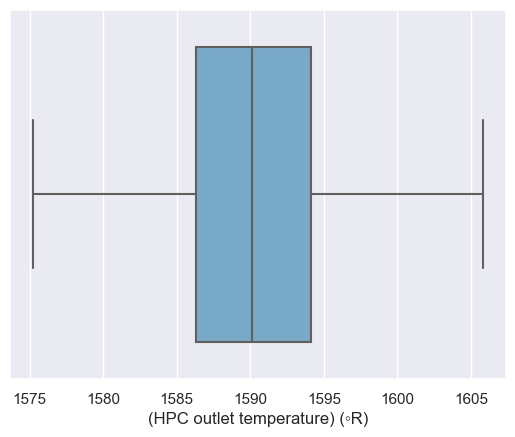

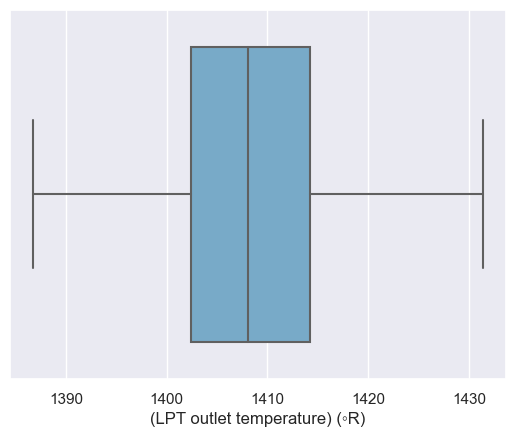

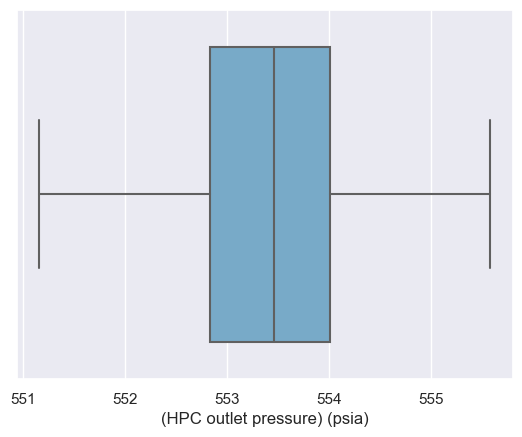

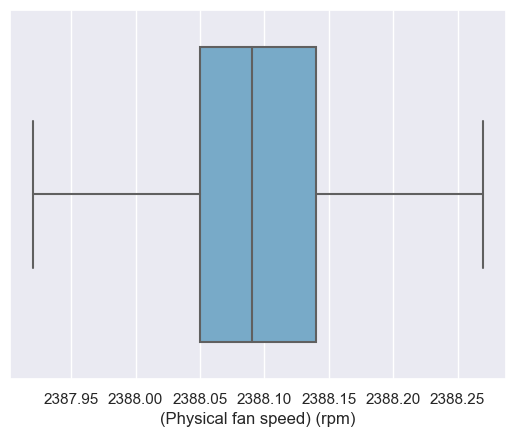

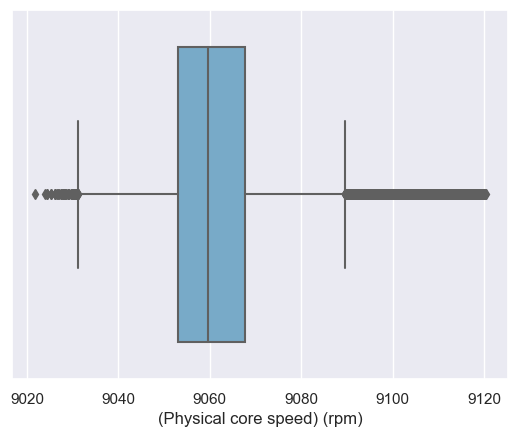

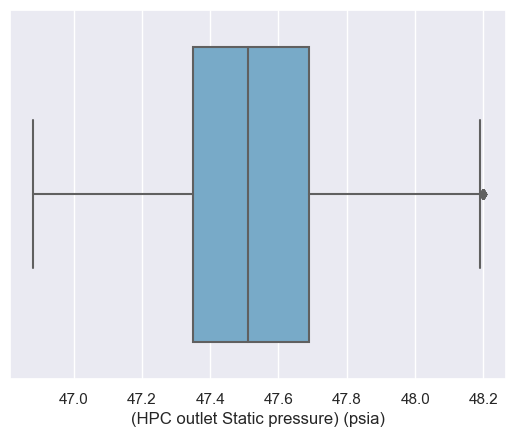

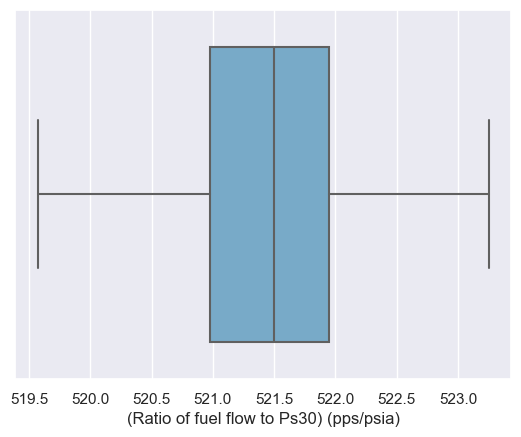

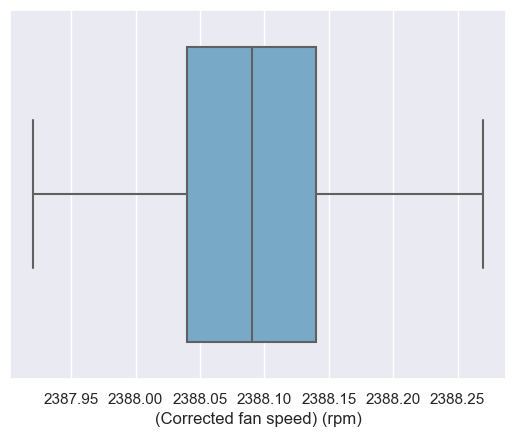

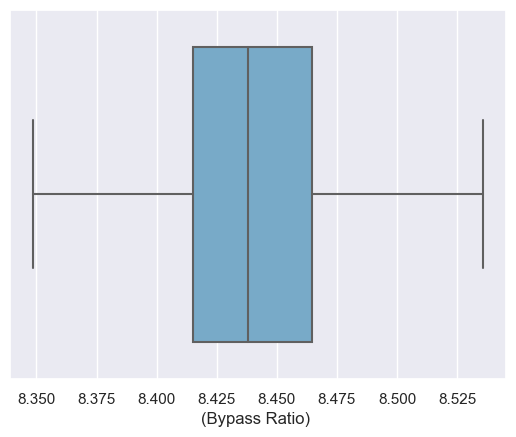

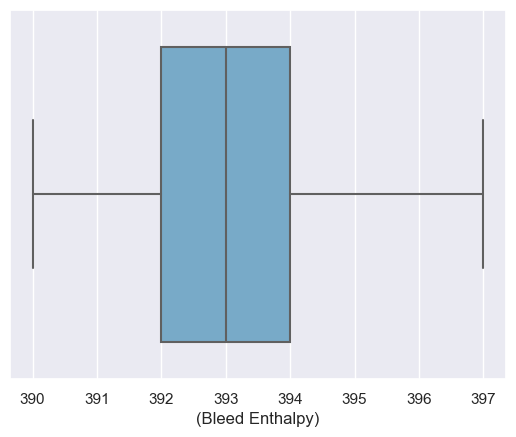

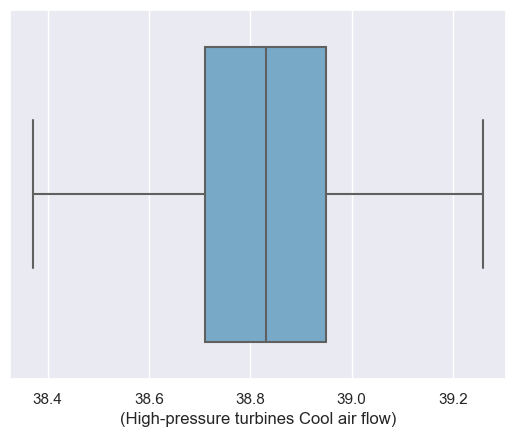

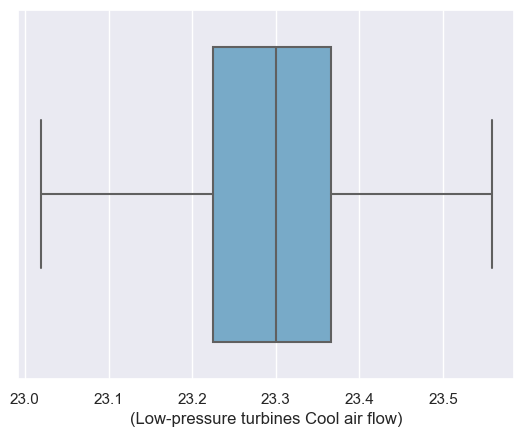

In [50]:
for i in data_train.select_dtypes(include=np.number):
    sns.boxplot(data_train[i],palette="Blues")
    plt.show()

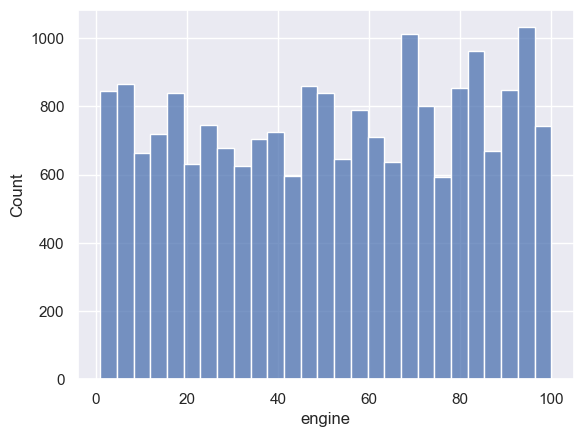

-0.06782944380677068


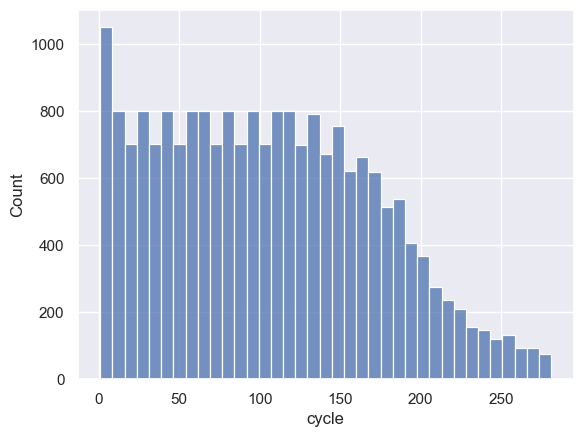

0.32963685468094284


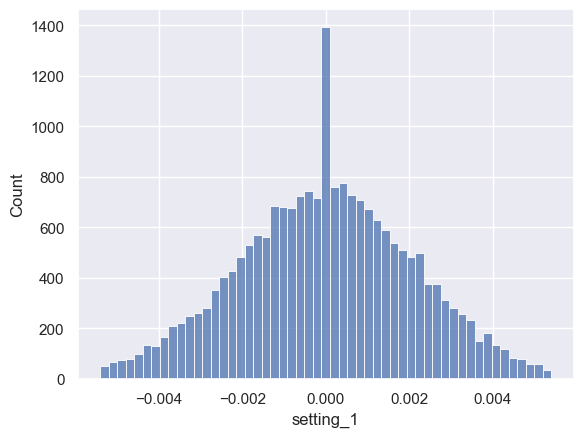

-0.024284468891137344


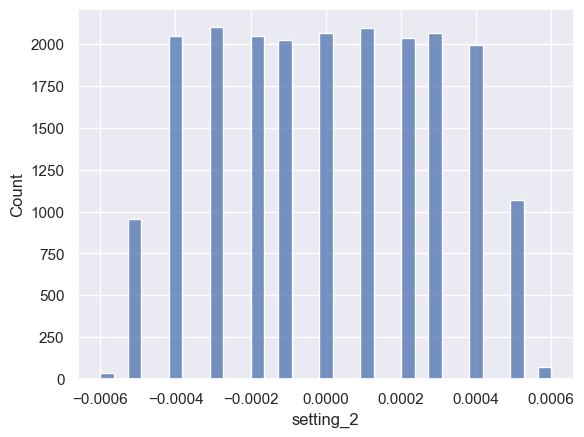

0.009011938592935809


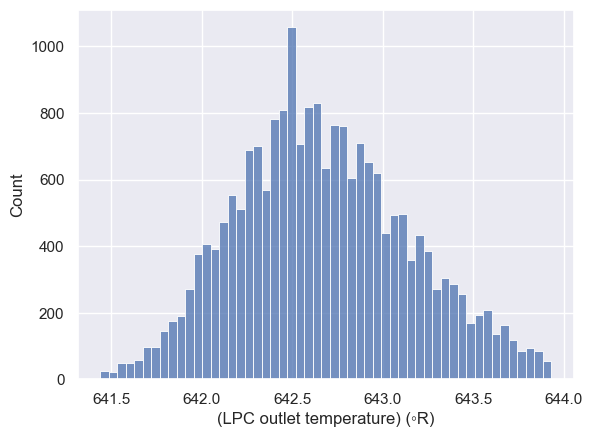

0.23919432041440467


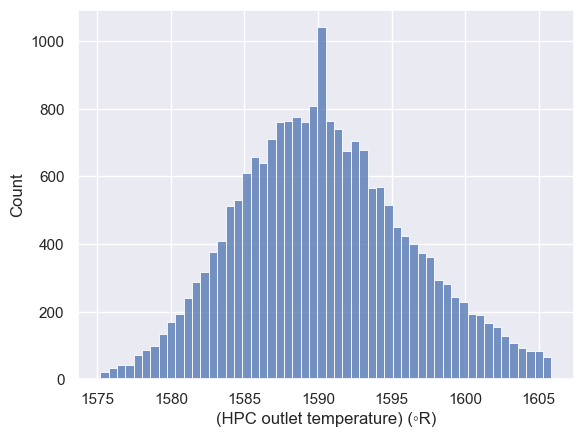

0.21513914803259684


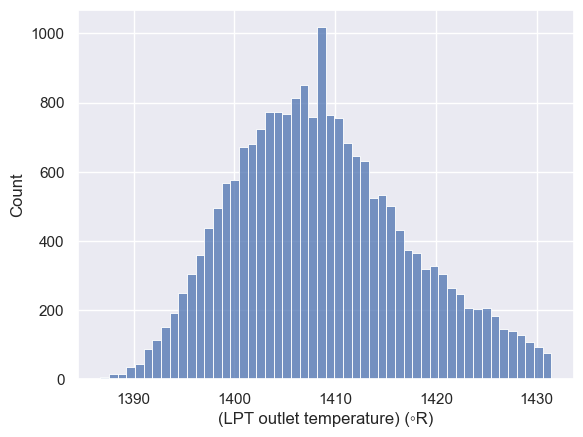

0.3451298370800777


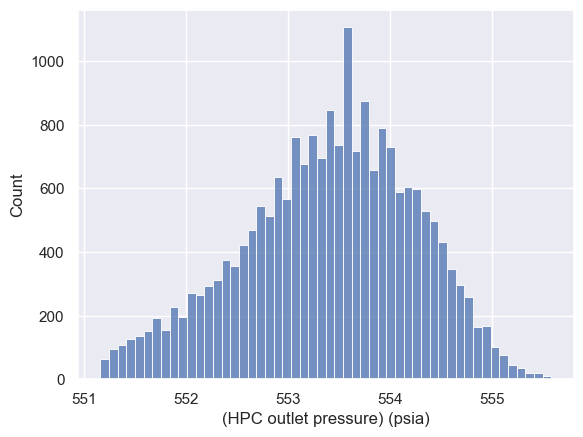

-0.3035763835604021


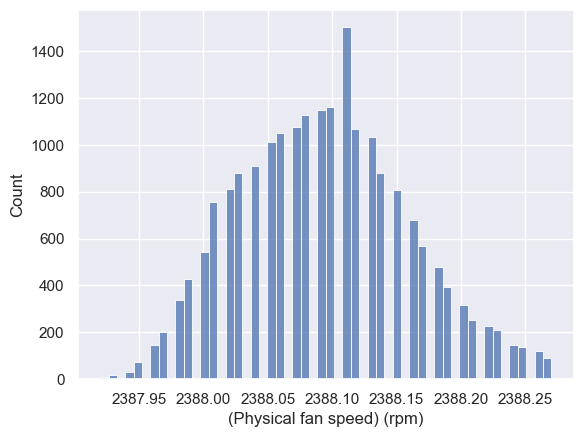

0.22600715641469188


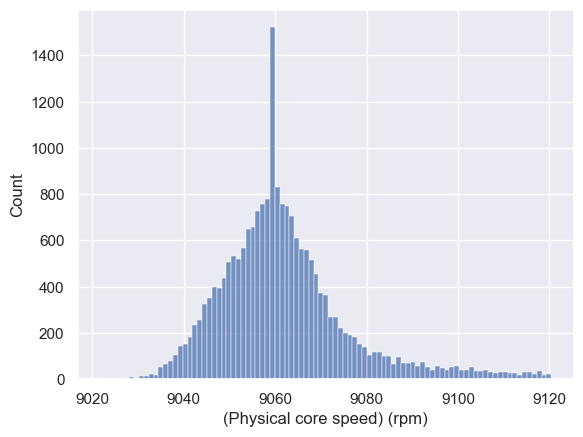

1.1944004017199714


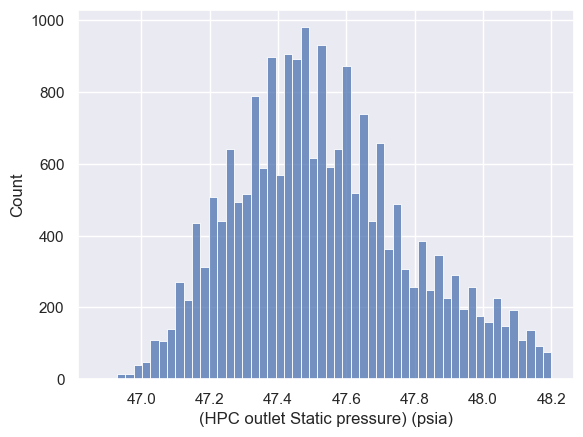

0.3856167128958328


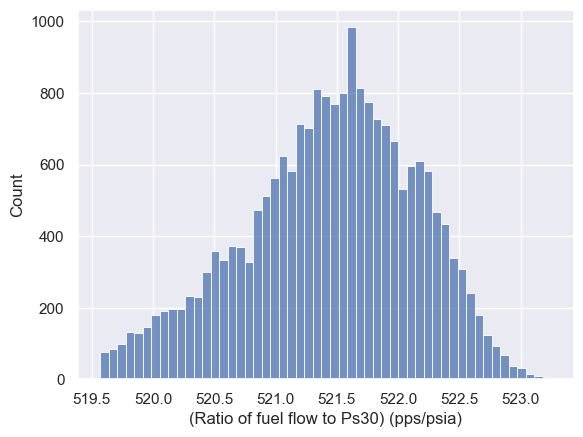

-0.346833797044433


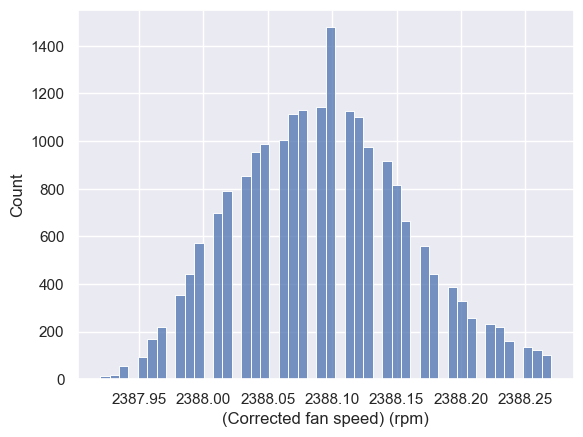

0.21812769854837813


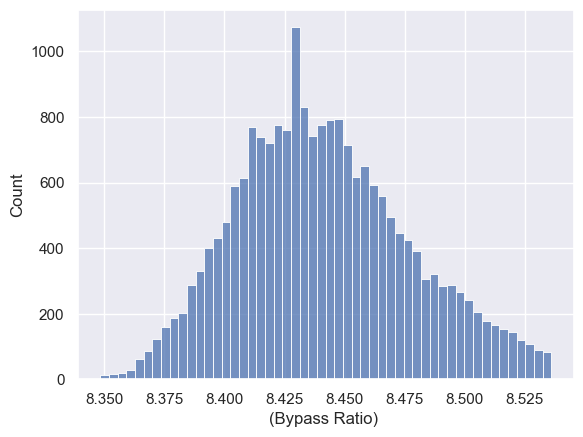

0.3139322222490744


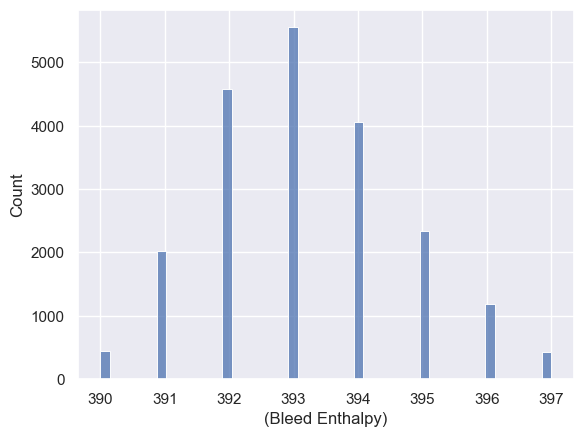

0.30730940879554614


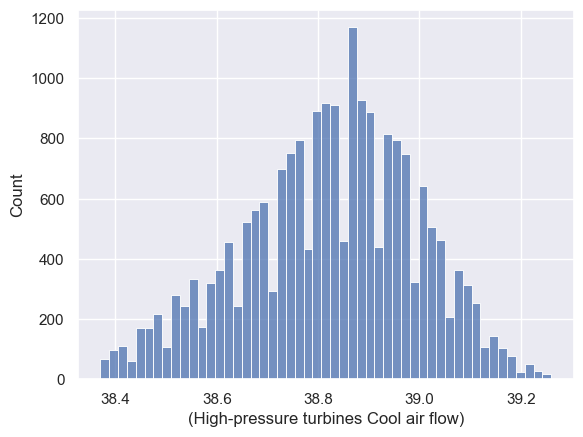

-0.2644562561320954


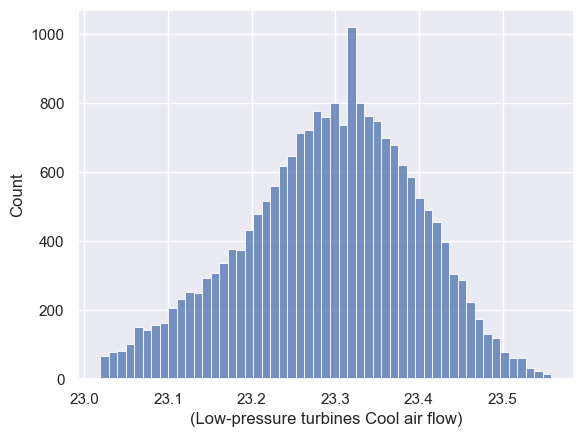

-0.26781854750582934


In [51]:
for i in data_train.select_dtypes(include=np.number):
    sns.set(style="darkgrid")
    sns.histplot(data_train[i],palette="Blues")
    
    plt.show()
    print(data_train[i].skew())

In [52]:
data_train.shape

(20630, 17)

In [53]:
print(data_train.shape)

(20630, 17)


Add RUL(REMAINING USEFUL LIFE) as a target feature to the data

In [54]:
data_train['cycle'].max()

281

In [55]:
# define the maximum life of each engine, 
#as this could be used to obtain the RUL at each point in time of the engine's life 

#remaining useful life (RUL) of each engine in the test dataset.
#RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.
data_train_RUL = data_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL.head()


,life
engine,
1,192
2,281
3,179
4,189
5,269


In [56]:
data_train=data_train.merge(data_train_RUL,how='left',on=['engine'])

In [57]:
data_train['RUL']=data_train['life']-data_train['cycle']
data_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
data_train['RUL'][data_train['RUL']>125]=125
data_train.head()


# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are



,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,125


In [58]:
print(data_train.isnull().sum())

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Bypass Ratio)                             0
(Bleed Enthalpy)                           0
(High-pressure turbines Cool air flow)     0
(Low-pressure turbines Cool air flow)      0
RUL                                        0
dtype: int64


In [59]:
data_train['RUL'].unique()

array([125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,
        86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,
        73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,
        60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,
        47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1,   0], dtype=int64)

In [60]:
print(data_train.shape)

(20630, 18)


Each cycle of a turbo engine generates a certain amount of wear and tear on its components, and the performance of the engine may degrade over time due to various factors, such as aging, contamination, or damage. Therefore, monitoring the engine cycles and predicting its remaining useful life (RUL) is crucial for ensuring its reliability and safety.

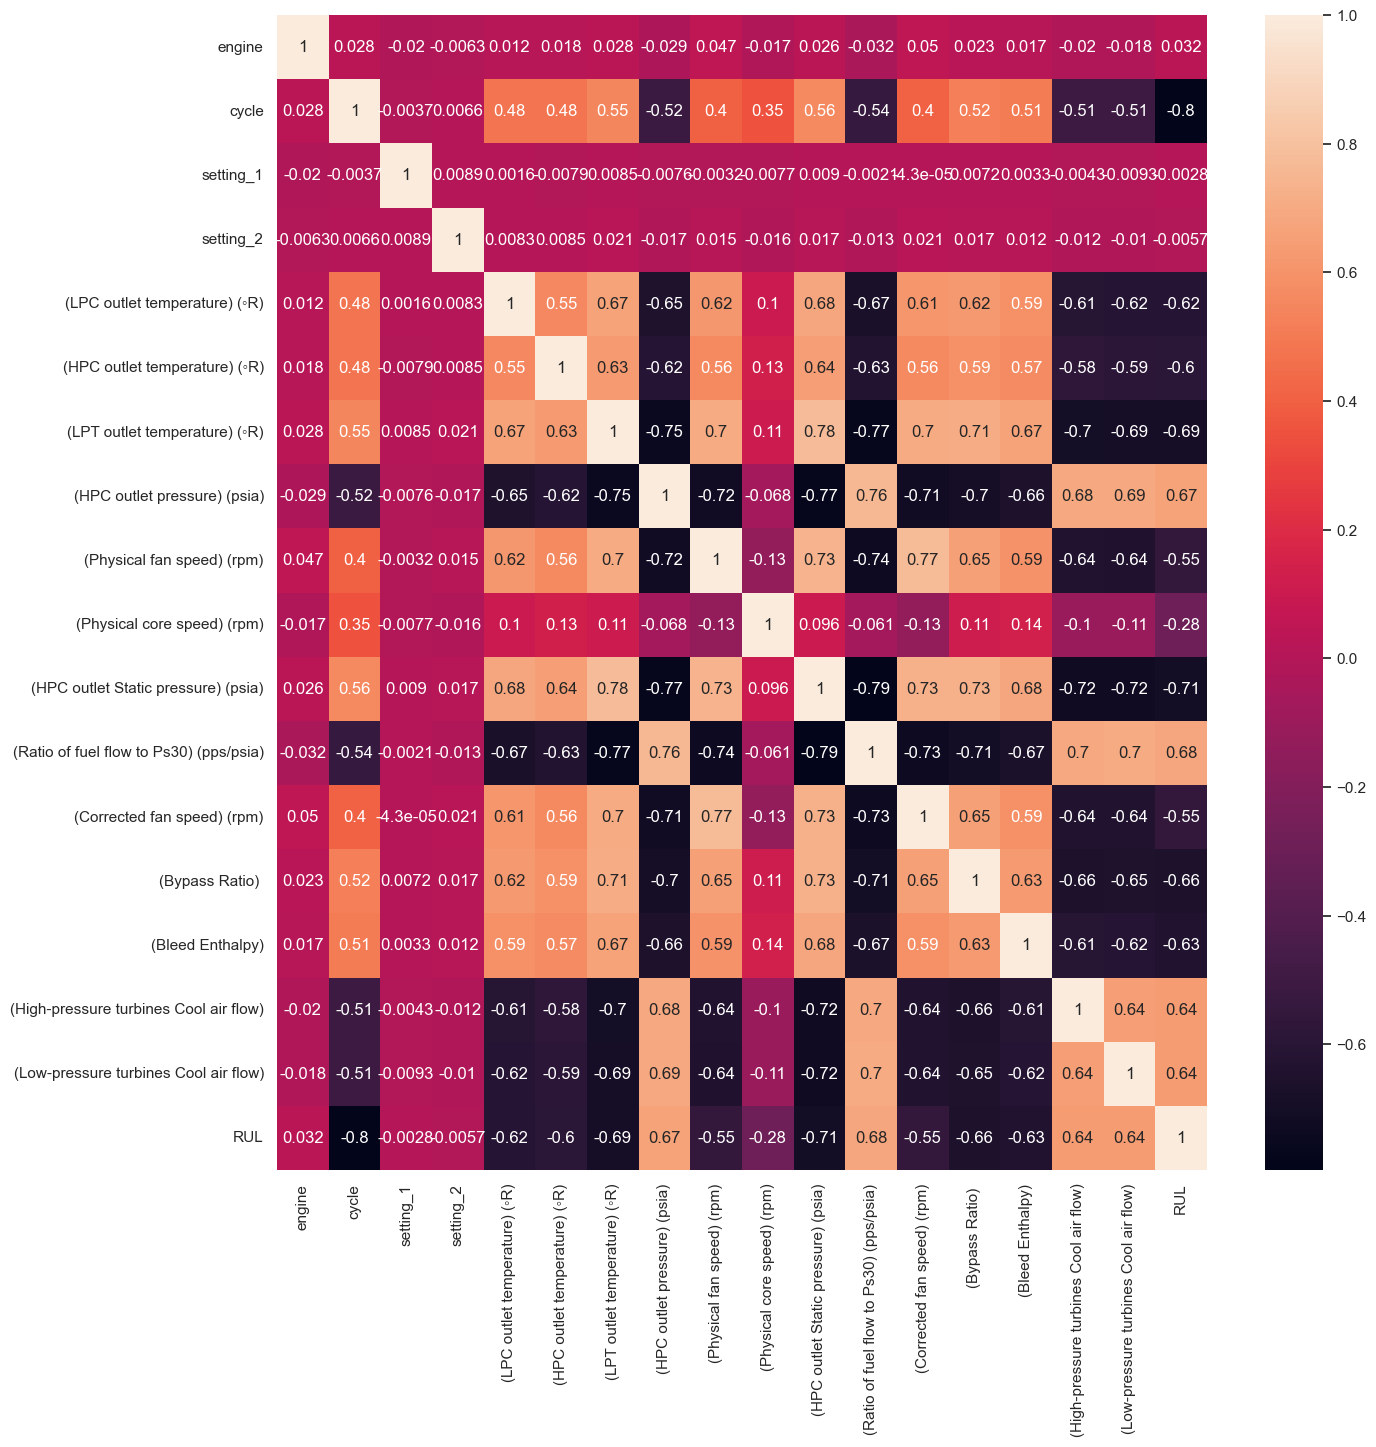

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(data_train.corr(), annot=True )
plt.show()

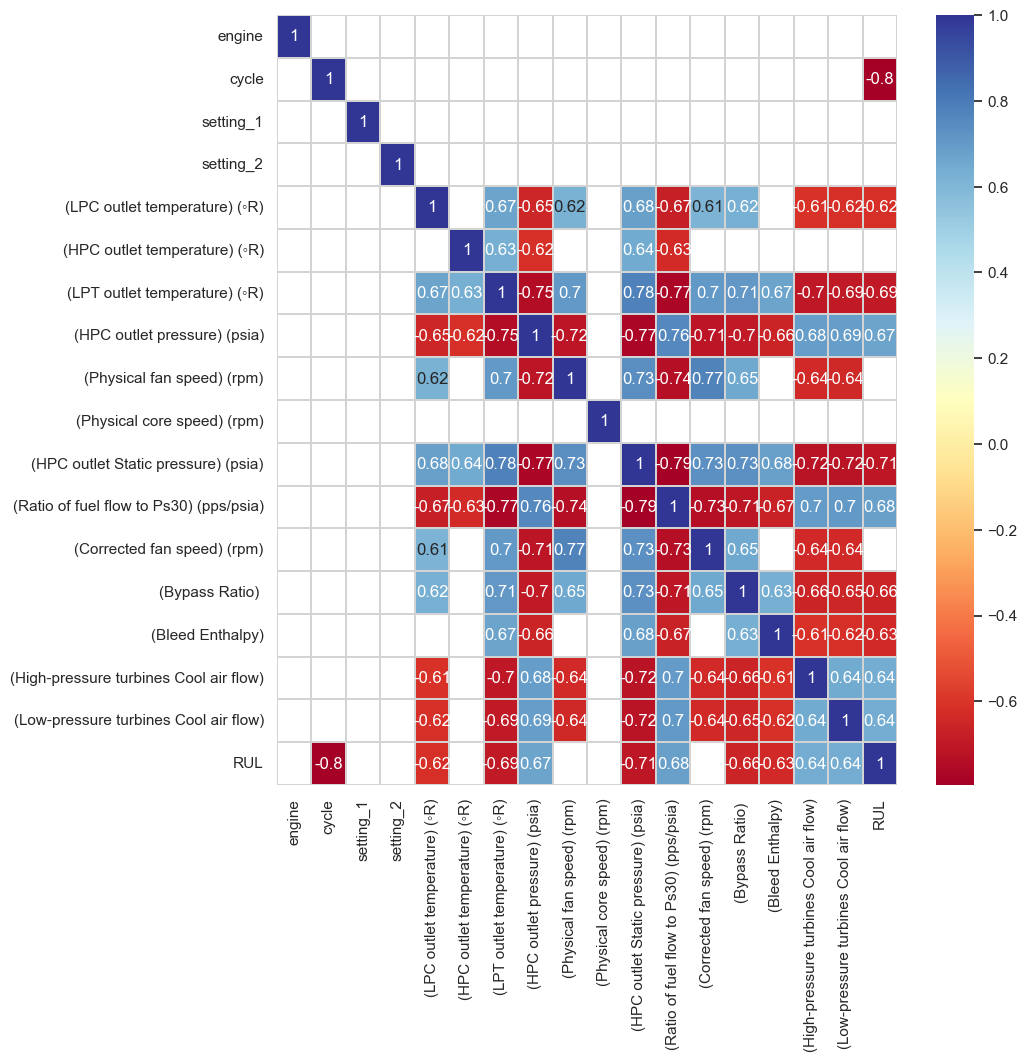

In [62]:
threshold = 0.90
plt.figure(figsize=(10,10))
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [63]:
data_train.drop(columns=['(Physical core speed) (rpm)','engine','setting_1','setting_2','engine'], inplace=True)

In [64]:
list(data_train)

['cycle',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 'RUL']

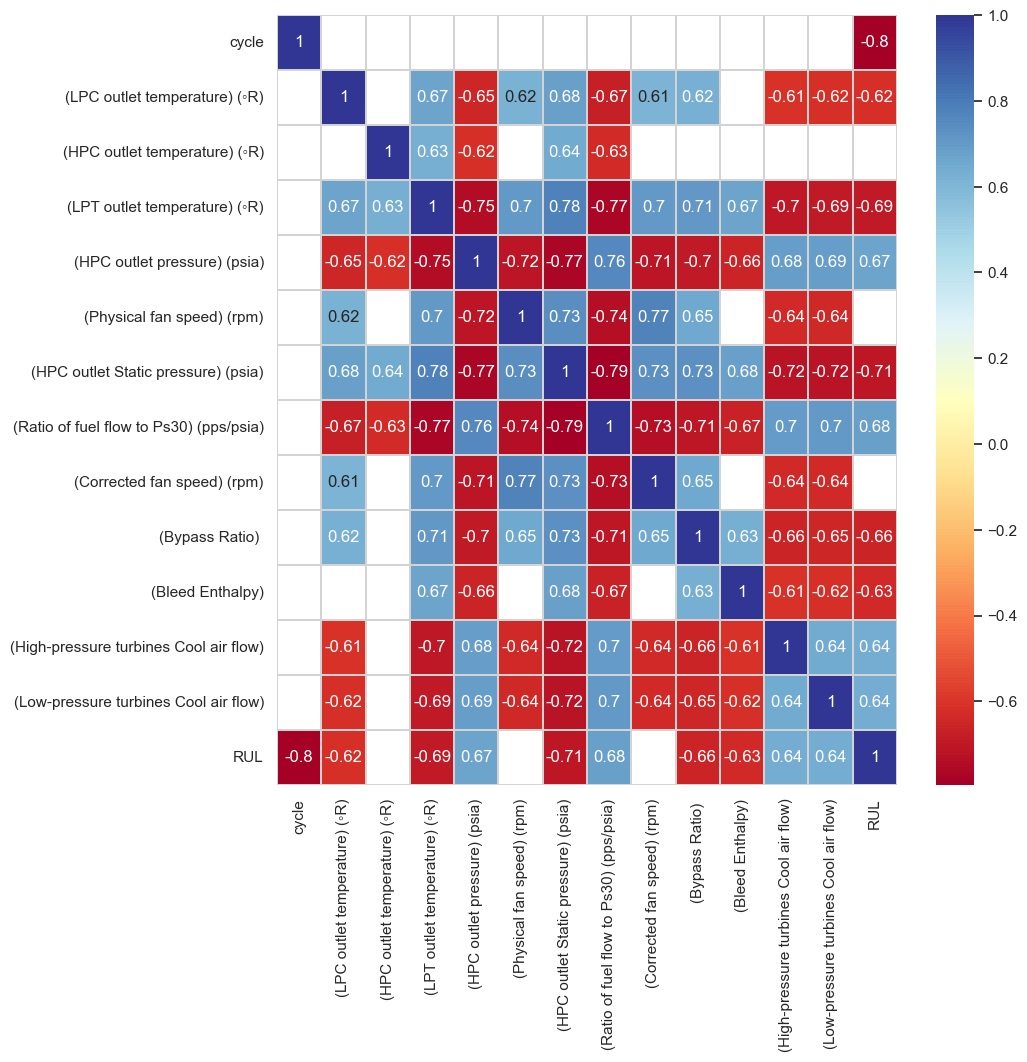

In [65]:
threshold = 0.90
plt.figure(figsize=(10,10))
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [66]:
data_train.drop(columns=['(Corrected fan speed) (rpm)','(Physical fan speed) (rpm)','(HPC outlet temperature) (◦R)'], inplace=True)

In [67]:
data_train.isnull().sum()

cycle                                      0
(LPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(HPC outlet pressure) (psia)               0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Bypass Ratio)                             0
(Bleed Enthalpy)                           0
(High-pressure turbines Cool air flow)     0
(Low-pressure turbines Cool air flow)      0
RUL                                        0
dtype: int64

In [68]:
data_train.nunique()

cycle                                       281
(LPC outlet temperature) (◦R)               250
(LPT outlet temperature) (◦R)              3862
(HPC outlet pressure) (psia)                436
(HPC outlet Static pressure) (psia)         133
(Ratio of fuel flow to Ps30) (pps/psia)     365
(Bypass Ratio)                             1770
(Bleed Enthalpy)                              8
(High-pressure turbines Cool air flow)       90
(Low-pressure turbines Cool air flow)      4553
RUL                                         126
dtype: int64

In [69]:
new_train_data=pd.DataFrame(data_train)

In [70]:
new_train_data

,cycle,(LPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,2,642.15,1403.14,553.75,47.49,522.28,8.4318,392,39.00,23.4236,125
1,3,642.35,1404.20,554.26,47.27,522.42,8.4178,390,38.95,23.3442,125
2,4,642.35,1401.87,554.45,47.13,522.86,8.3682,392,38.88,23.3739,125
3,5,642.37,1406.22,554.00,47.28,522.19,8.4294,393,38.90,23.4044,125
4,6,642.10,1398.37,554.67,47.16,521.68,8.4108,391,38.98,23.3669,125
...,...,...,...,...,...,...,...,...,...,...,...
20625,196,643.49,1428.63,551.43,48.07,521.63,8.4956,397,38.49,23.3222,4
20626,197,643.54,1409.01,553.62,48.04,519.68,8.5139,395,38.86,23.1594,3
20627,198,643.42,1428.18,553.62,48.09,520.01,8.4309,393,38.44,23.3222,2
20628,199,643.23,1426.53,553.62,47.46,519.67,8.4309,395,38.86,23.0640,1


In [71]:
x= data_train.iloc[:, :-1]
y = data_train.iloc[:,-1]

In [74]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [75]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (16504, 10)
x_test shape :  (4126, 10)
y_train shape :  (16504,)
y_test shape :  (4126,)


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [78]:
# make predictions on the testing data
y_pred = model.predict(x_test)


In [79]:
# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")
print(f"mean_absolute_percentage_error: {mape}")

Mean squared error: 400.5540896678128
Root mean squared error: 20.013847447899987
R-squared score: 0.763054342684
mean_absolute_percentage_error: 282810605651872.1


In [80]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  LinearRegression() Has a training score of 77.0 % accuracy score


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 400.5540896678128
Root mean squared error: 20.013847447899987
R-squared score: 0.763054342684


In [83]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  RandomForestRegressor() Has a training score of 83.0 % accuracy score


# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 400.5540896678128
Root mean squared error: 20.013847447899987
R-squared score: 0.763054342684


In [86]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  DecisionTreeRegressor() Has a training score of 66.0 % accuracy score


# KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor()

In [88]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 400.5540896678128
Root mean squared error: 20.013847447899987
R-squared score: 0.763054342684


In [89]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  KNeighborsRegressor() Has a training score of 81.0 % accuracy score


# GradientBoosting

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [91]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 400.5540896678128
Root mean squared error: 20.013847447899987
R-squared score: 0.763054342684


In [92]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Algorithm:  GradientBoostingRegressor() Has a training score of 83.0 % accuracy score


# Conclusion

In [ ]:
as we saw accuracy from 
GradientBoostingRegressor() Has a training score of 83.0 % accuracy score

KNeighborsRegressor() Has a training score of 81.0 % accuracy score

RandomForestRegressor() Has a training score of 83.0 % accuracy score

LinearRegression() Has a training score of 77.0 % accuracy score

DecisionTreeRegressor() Has a training score of 66.0 % accuracy score


#so Gradient boosting has highest accuracy of 83% ., 

## Learnings

1.It was learning journey .,I understood., How different model works on our project 2.I thought linear Regression gives best result., but surprisingly (ensemble models) Random Forest and GradientBoosting gave best result

i.e: Boosting is a technique to combine weak learners and convert them into strong ones with the help of Machine Learning algorithms. It uses ensemble learning to boost the accuracy of a model.

so I learnt combination of many weak models., can actually gives good model; and I understood the usage of Gradient Boosting

(Select a weak learner, Use an additive model, Define a loss function, Minimize the loss function)

Out of 27 columns or 27 Features only 10 Features are important to determine RUL(REMAING USEFUL LIFE) i.e 1.cycle,
(LPC outlet temperature) (◦R),
(LPT outlet temperature) (◦R),
(HPC outlet pressure) (psia),
(HPC outlet Static pressure) (psia),
(Ratio of fuel flow to Ps30) (pps/psia),
(Bypass Ratio),
(Bleed Enthalpy),
(High-pressure turbines Cool air flow),
(Low-pressure turbines Cool air flow)
4.I learnt functions, usage of turbo engine.., and learnt "how can we determine Remaining useful life of Turbo Engine" by based on Engines wear and tear after every cycles.,

Determining the remaining useful life of turbo engine., helps us to save 'DAMAGE OF AEROPLANE., WHICH CAN SAVE MANY LIVES';

THANK YOU.,